## Description of Notebook

The notebook is used to look closer into VDFs and the fields files in order to identify the stable and unstable periods. This notebook is also used to prepare the data for the machine learning (yet without the partitioning of the data into the train and test data sets which will be done separately)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import kineticsim_reader as kr
import pickle
import os
import random
from scipy.signal import savgol_filter
from tqdm import tqdm
from matplotlib.animation import FuncAnimation

C:\Users\Slava\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


## Generation of animations of the VDFs

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_A0.5Hepp_beta0.5eps1e-4_256
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Total frames: 81


C:\Users\Slava\AppData\Local\Temp/ipykernel_10640/2767143837.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbar_ax1 = im.add_axes([0.05, 0.10, 0.40, 0.02])
C:\Users\Slava\AppData\Local\Temp/ipykernel_10640/2767143837.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbar_ax2 = im.add_axes([0.55, 0.10, 0.40, 0.02])


vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_A0.75Hepp_beta1_256
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Total frames: 49


C:\Users\Slava\AppData\Local\Temp/ipykernel_10640/2767143837.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbar_ax1 = im.add_axes([0.05, 0.10, 0.40, 0.02])
C:\Users\Slava\AppData\Local\Temp/ipykernel_10640/2767143837.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbar_ax2 = im.add_axes([0.55, 0.10, 0.40, 0.02])


vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_E11Ap3.3Aa2.0Vd0.42
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Total frames: 49


C:\Users\Slava\AppData\Local\Temp/ipykernel_10640/2767143837.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbar_ax1 = im.add_axes([0.05, 0.10, 0.40, 0.02])
C:\Users\Slava\AppData\Local\Temp/ipykernel_10640/2767143837.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbar_ax2 = im.add_axes([0.55, 0.10, 0.40, 0.02])


vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_E11Ap4.3Aa1.6
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Total frames: 49


C:\Users\Slava\AppData\Local\Temp/ipykernel_10640/2767143837.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbar_ax1 = im.add_axes([0.05, 0.10, 0.40, 0.02])
C:\Users\Slava\AppData\Local\Temp/ipykernel_10640/2767143837.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbar_ax2 = im.add_axes([0.55, 0.10, 0.40, 0.02])


vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_E11Ap4.3Aa1.6Vd0.32
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Total frames: 49


C:\Users\Slava\AppData\Local\Temp/ipykernel_10640/2767143837.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbar_ax1 = im.add_axes([0.05, 0.10, 0.40, 0.02])
C:\Users\Slava\AppData\Local\Temp/ipykernel_10640/2767143837.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbar_ax2 = im.add_axes([0.55, 0.10, 0.40, 0.02])


vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_E12Ap1.86Aa1.0Vd0.32_256_256x256
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Total frames: 51


C:\Users\Slava\AppData\Local\Temp/ipykernel_10640/2767143837.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbar_ax1 = im.add_axes([0.05, 0.10, 0.40, 0.02])
C:\Users\Slava\AppData\Local\Temp/ipykernel_10640/2767143837.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbar_ax2 = im.add_axes([0.55, 0.10, 0.40, 0.02])


vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_E12Ap1.86Aa1.0Vd0.32_512_256x256
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Total frames: 51


C:\Users\Slava\AppData\Local\Temp/ipykernel_10640/2767143837.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbar_ax1 = im.add_axes([0.05, 0.10, 0.40, 0.02])
C:\Users\Slava\AppData\Local\Temp/ipykernel_10640/2767143837.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbar_ax2 = im.add_axes([0.55, 0.10, 0.40, 0.02])


vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_He++A10_256_iden0eps0
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Total frames: 49


C:\Users\Slava\AppData\Local\Temp/ipykernel_10640/2767143837.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbar_ax1 = im.add_axes([0.05, 0.10, 0.40, 0.02])
C:\Users\Slava\AppData\Local\Temp/ipykernel_10640/2767143837.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbar_ax2 = im.add_axes([0.55, 0.10, 0.40, 0.02])


vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_He++v2_256_256ppc_iden3v0m0.5pwr6eps0
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Total frames: 26


C:\Users\Slava\AppData\Local\Temp/ipykernel_10640/2767143837.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbar_ax1 = im.add_axes([0.05, 0.10, 0.40, 0.02])
C:\Users\Slava\AppData\Local\Temp/ipykernel_10640/2767143837.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbar_ax2 = im.add_axes([0.55, 0.10, 0.40, 0.02])


vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_He++v2_256_iden0eps1e-4t600
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Total frames: 93


C:\Users\Slava\AppData\Local\Temp/ipykernel_10640/2767143837.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbar_ax1 = im.add_axes([0.05, 0.10, 0.40, 0.02])
C:\Users\Slava\AppData\Local\Temp/ipykernel_10640/2767143837.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbar_ax2 = im.add_axes([0.55, 0.10, 0.40, 0.02])


vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_He++vd1.5_256_iden0eps1e-4
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Total frames: 81


C:\Users\Slava\AppData\Local\Temp/ipykernel_10640/2767143837.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbar_ax1 = im.add_axes([0.05, 0.10, 0.40, 0.02])
C:\Users\Slava\AppData\Local\Temp/ipykernel_10640/2767143837.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbar_ax2 = im.add_axes([0.55, 0.10, 0.40, 0.02])


vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_pv1.5_128_64_iden0eps1e-4_dx0.75_long
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Total frames: 151


C:\Users\Slava\AppData\Local\Temp/ipykernel_10640/2767143837.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbar_ax1 = im.add_axes([0.05, 0.10, 0.40, 0.02])
C:\Users\Slava\AppData\Local\Temp/ipykernel_10640/2767143837.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbar_ax2 = im.add_axes([0.55, 0.10, 0.40, 0.02])


vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_pv2a_128x3_iden0eps1e-4_dx0.75
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Total frames: 76


C:\Users\Slava\AppData\Local\Temp/ipykernel_10640/2767143837.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbar_ax1 = im.add_axes([0.05, 0.10, 0.40, 0.02])
C:\Users\Slava\AppData\Local\Temp/ipykernel_10640/2767143837.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbar_ax2 = im.add_axes([0.55, 0.10, 0.40, 0.02])


vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_pv2av2_rdna0.03375_128x3_iden0eps1e-4_dx0.75_t6000
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Total frames: 38


C:\Users\Slava\AppData\Local\Temp/ipykernel_10640/2767143837.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbar_ax1 = im.add_axes([0.05, 0.10, 0.40, 0.02])
C:\Users\Slava\AppData\Local\Temp/ipykernel_10640/2767143837.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbar_ax2 = im.add_axes([0.55, 0.10, 0.40, 0.02])


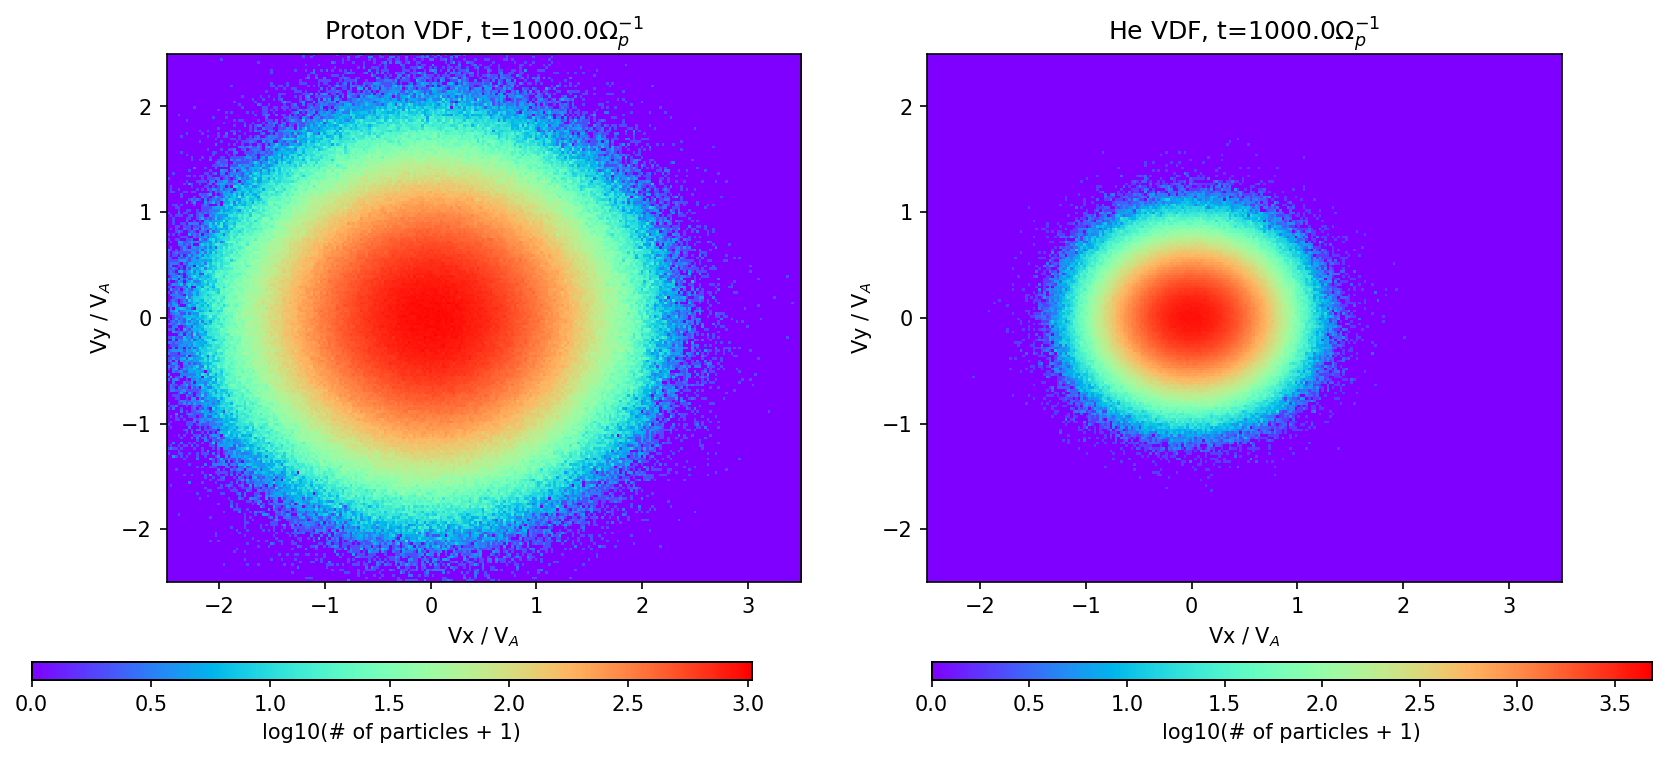

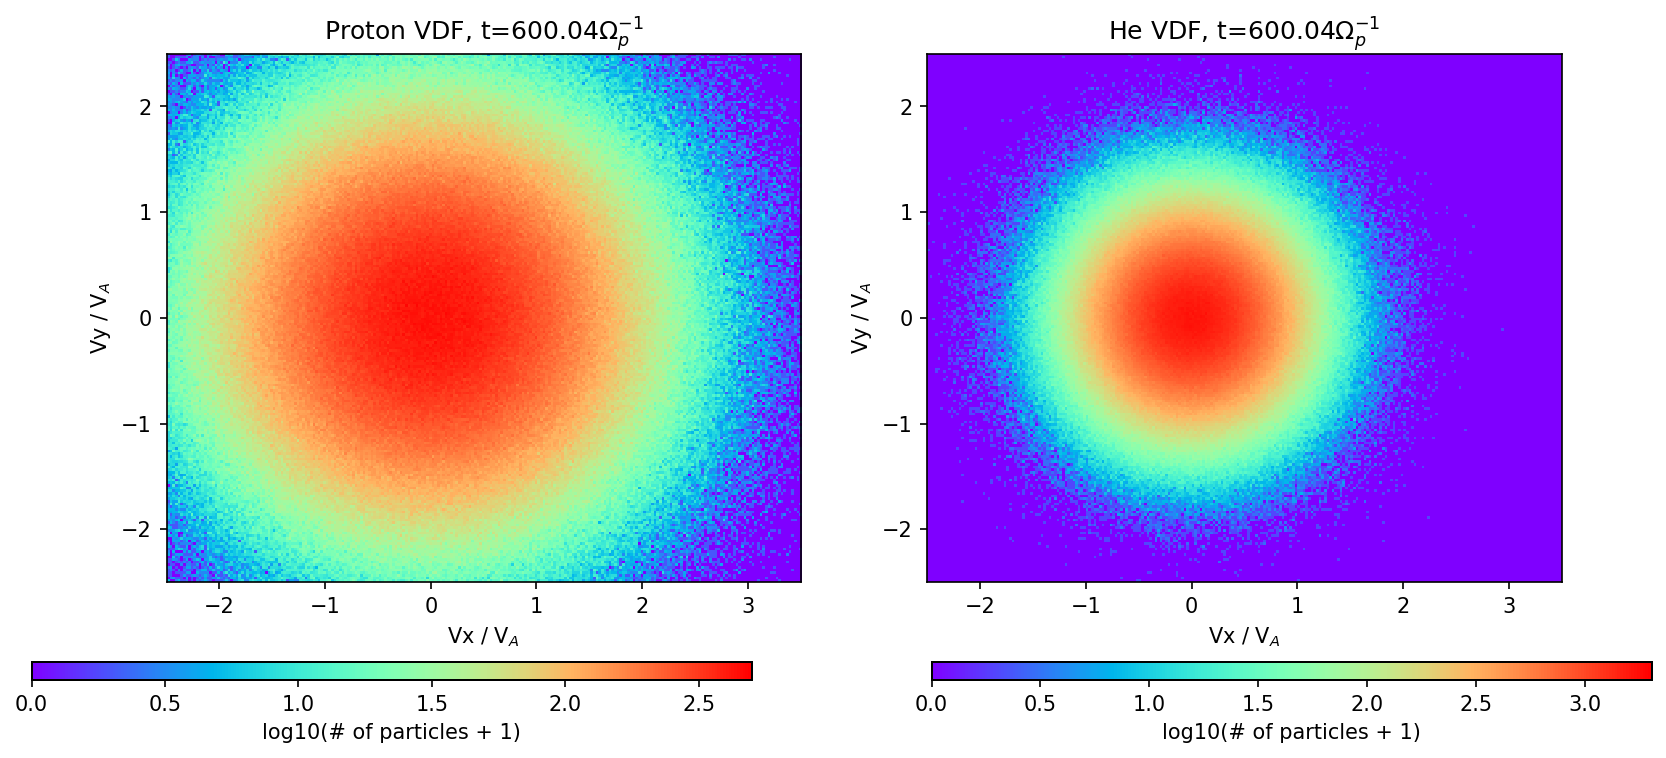

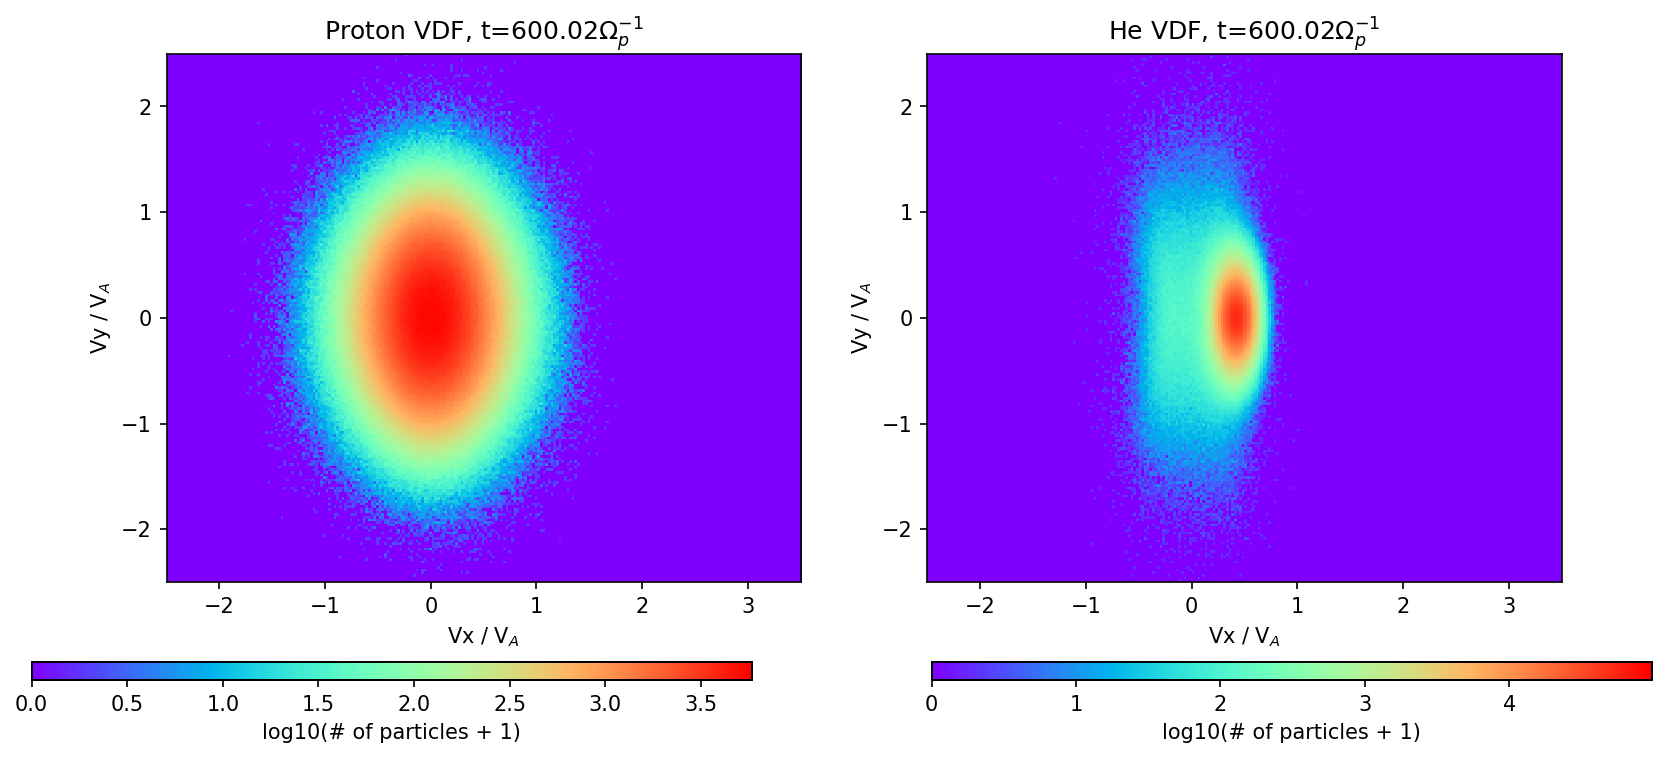

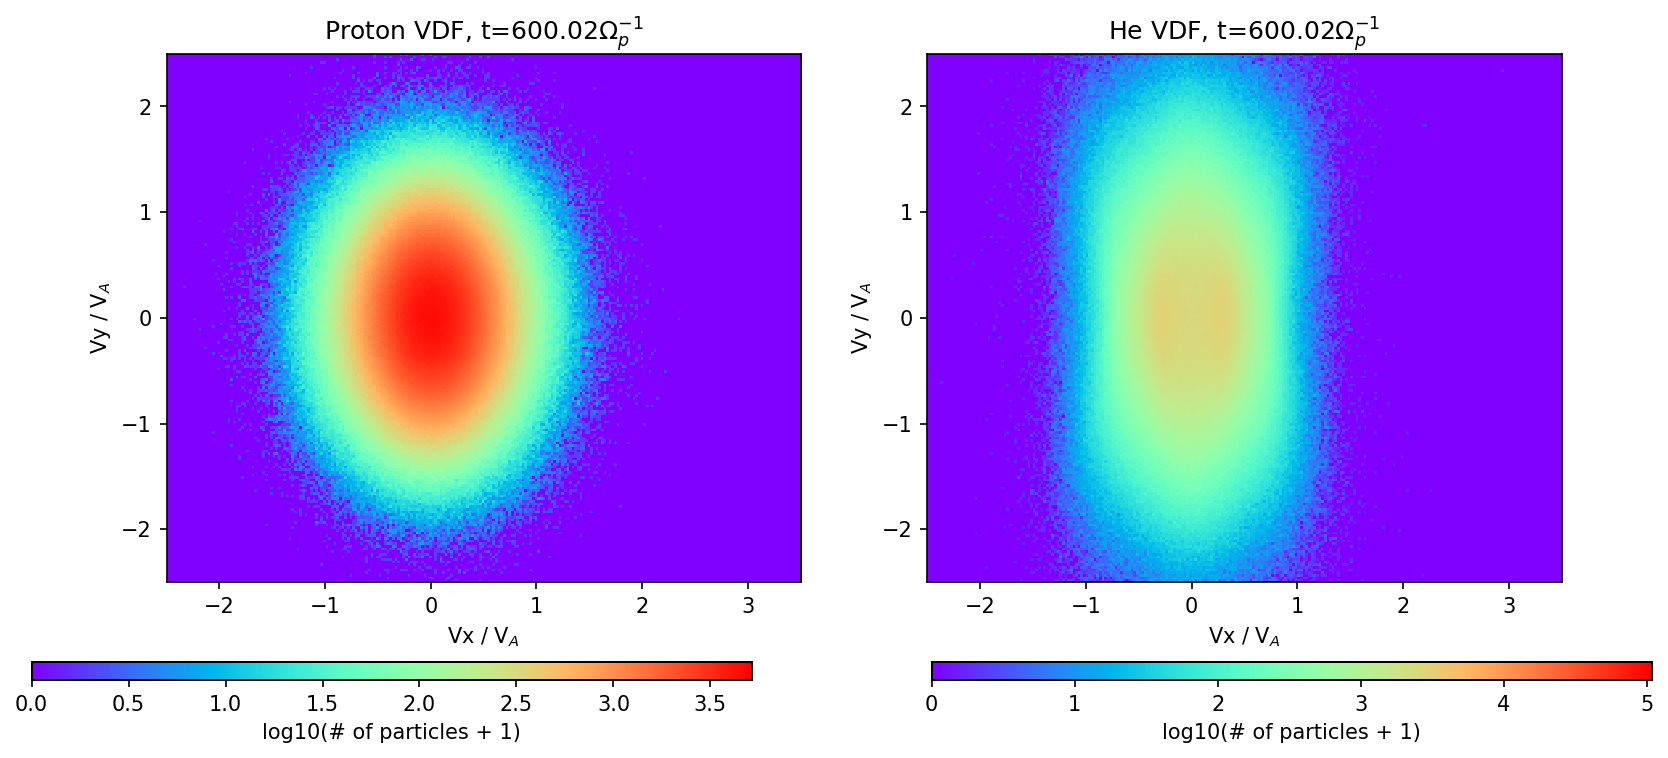

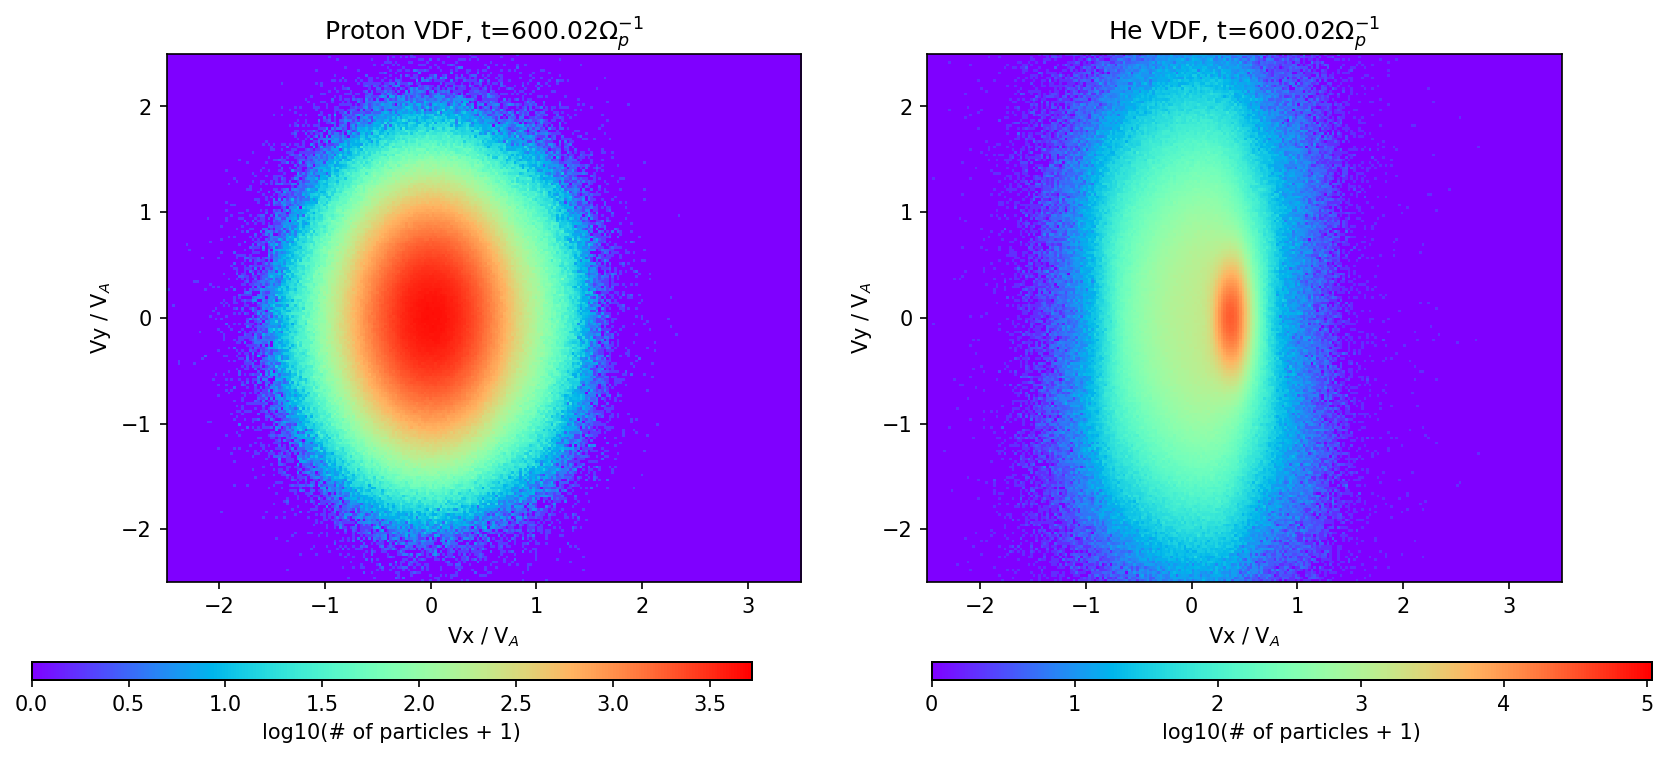

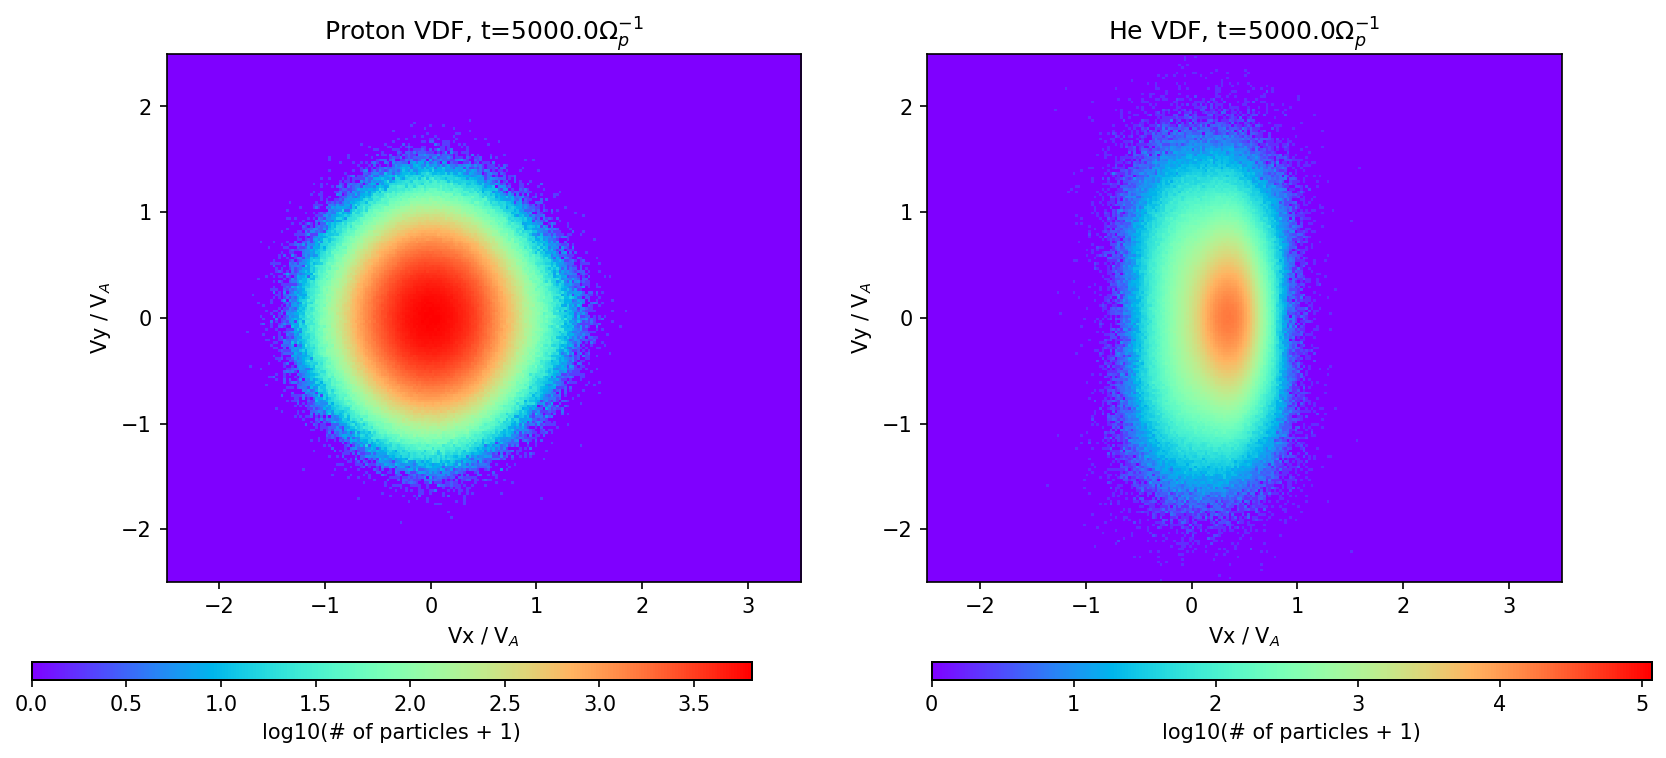

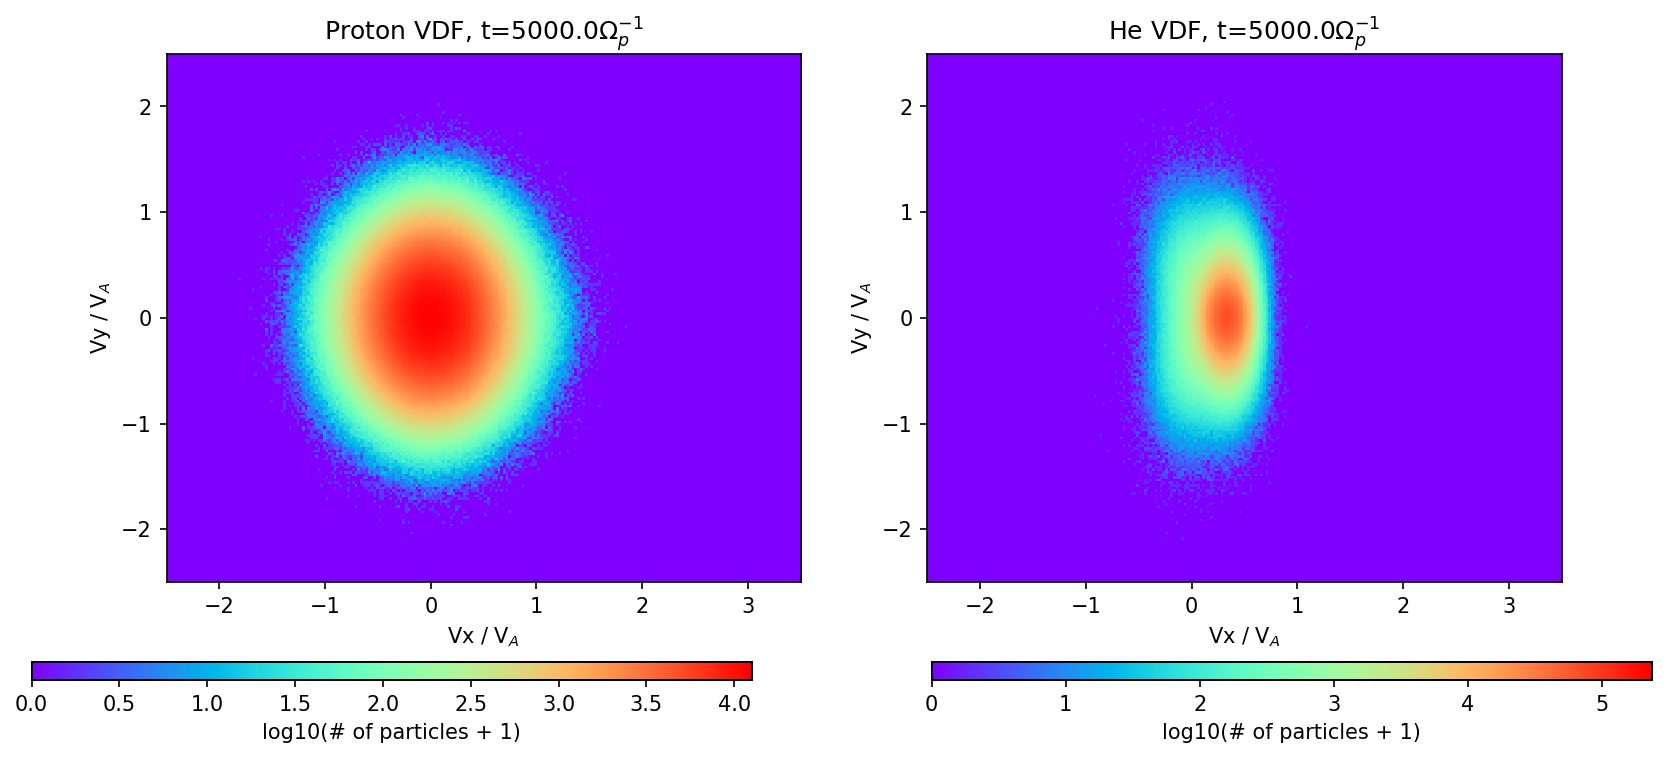

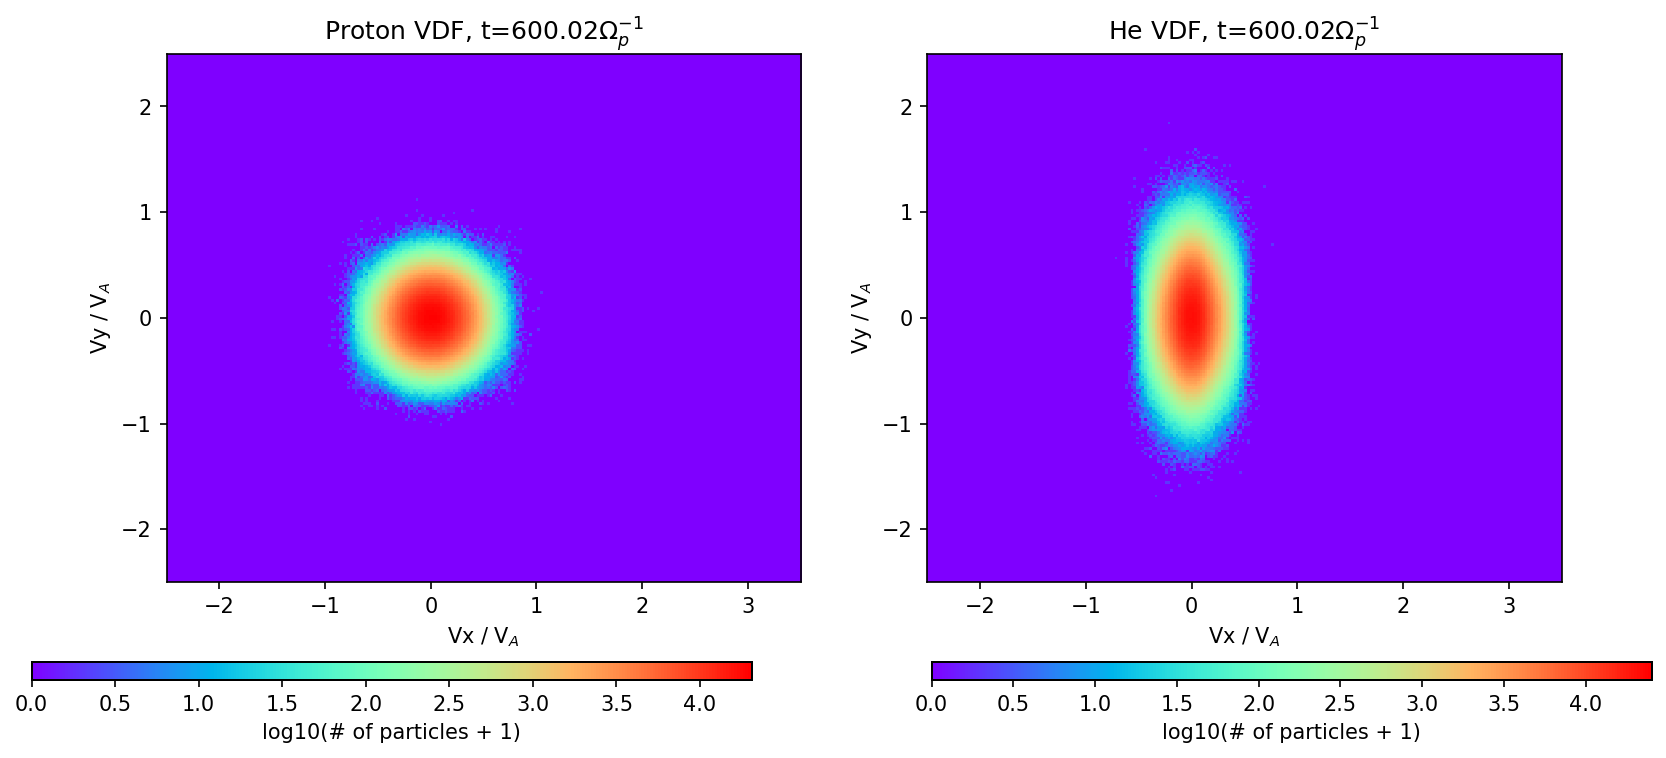

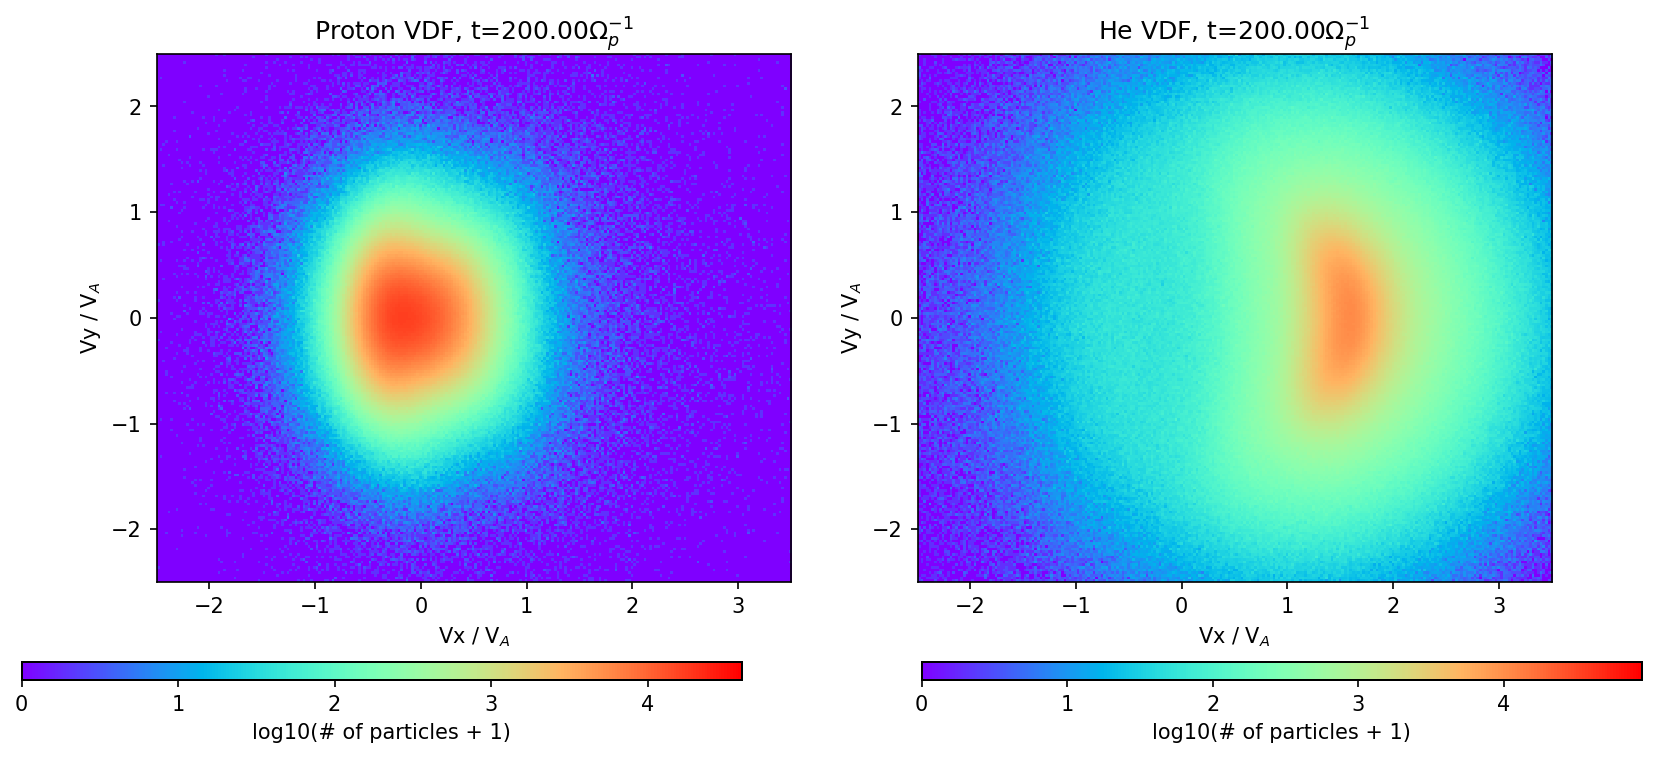

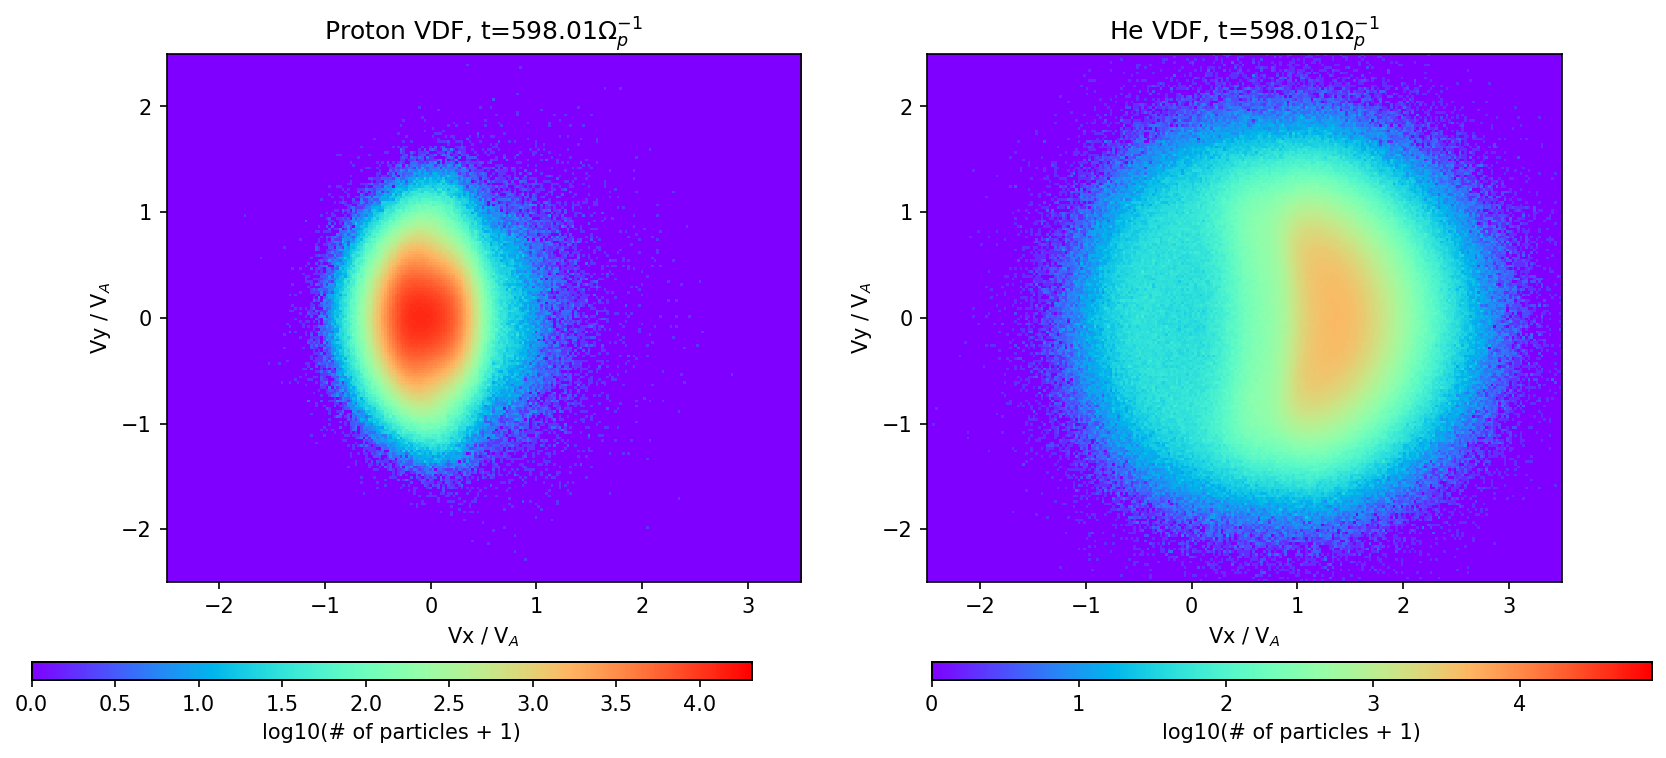

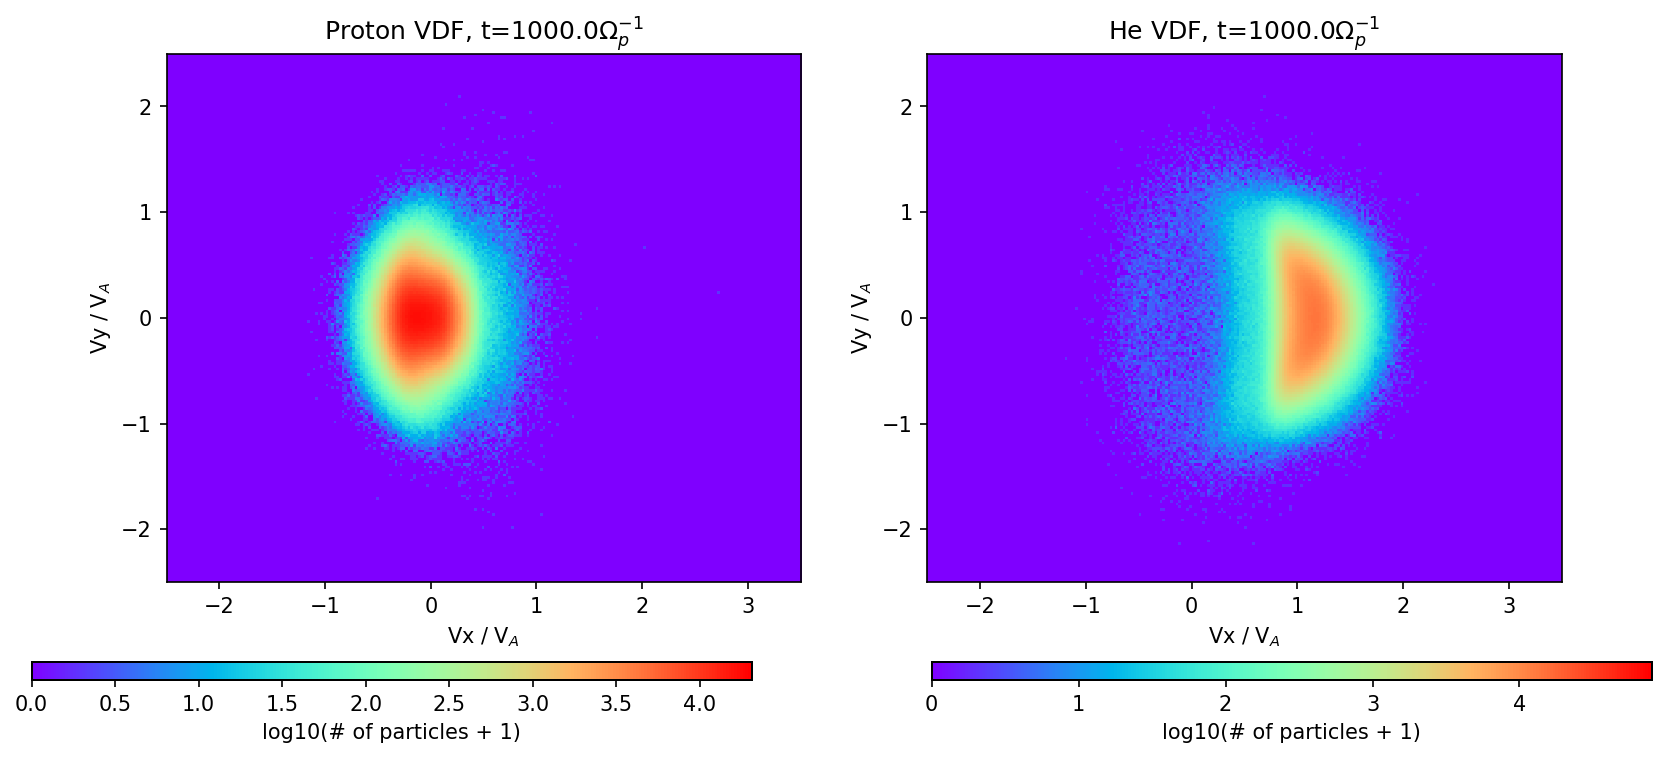

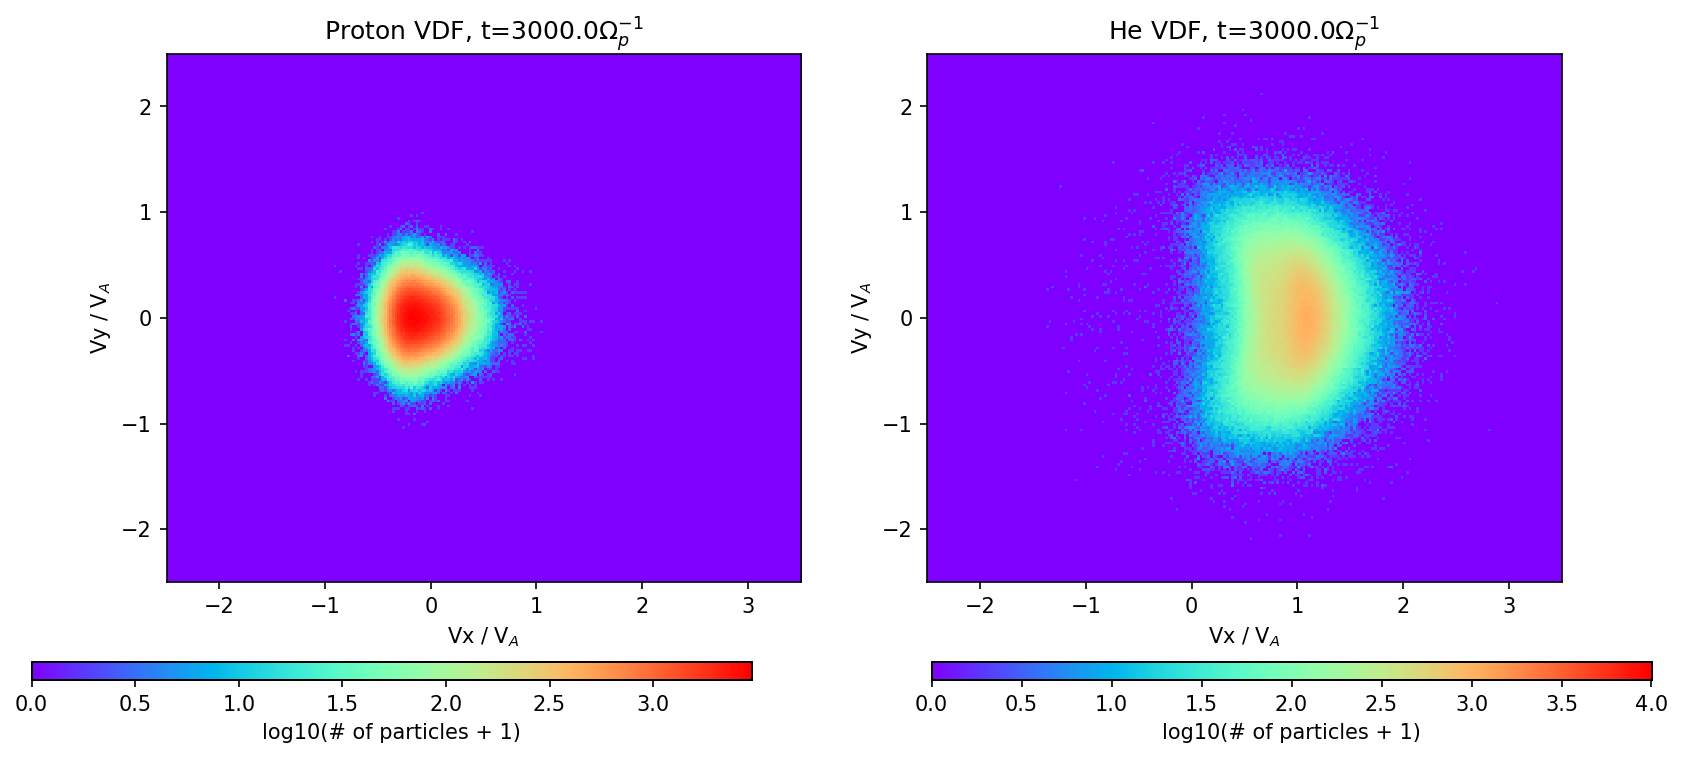

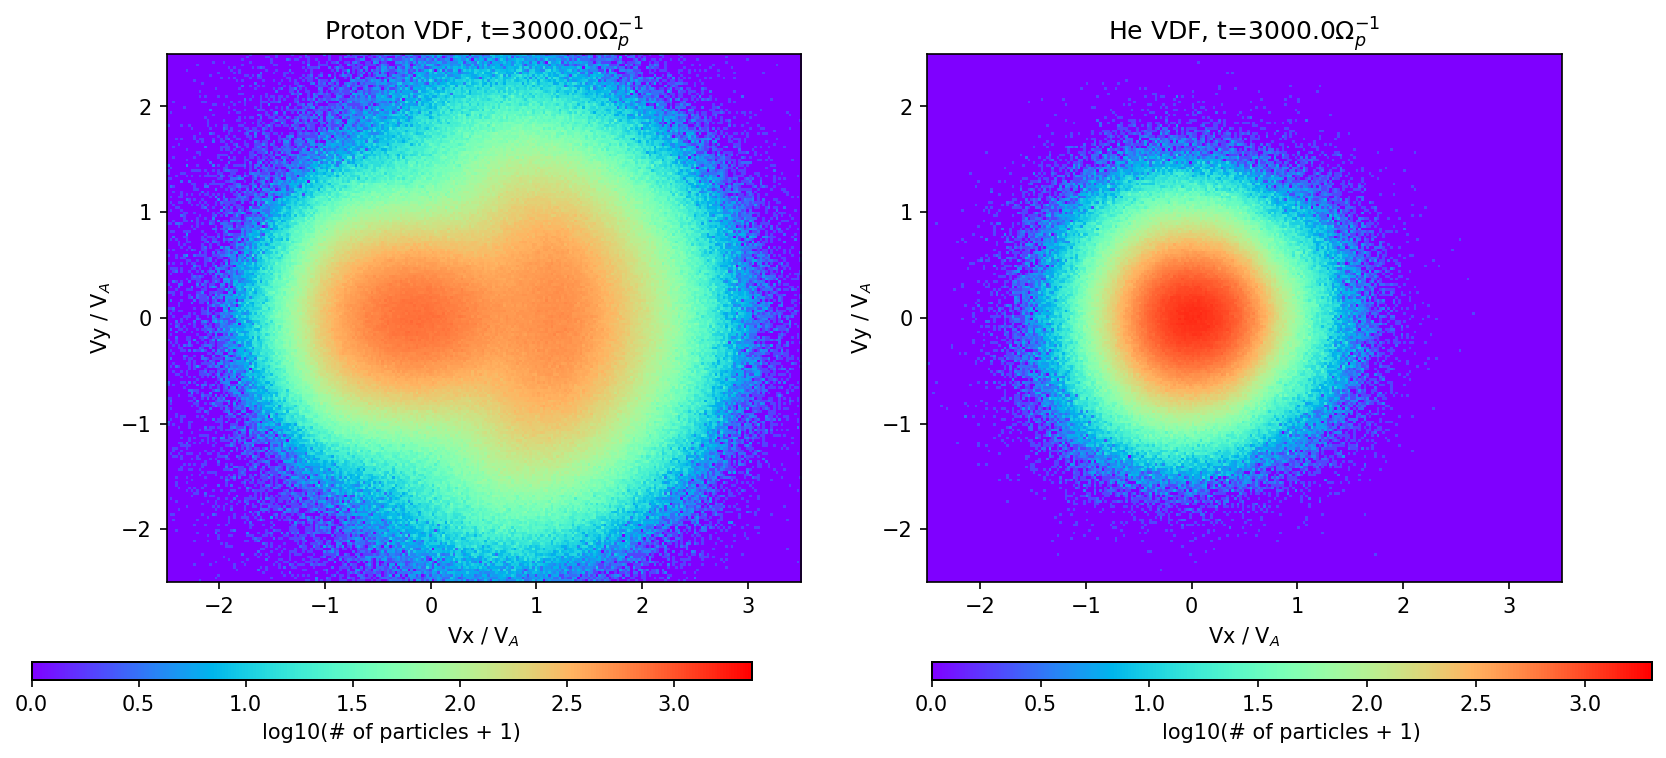

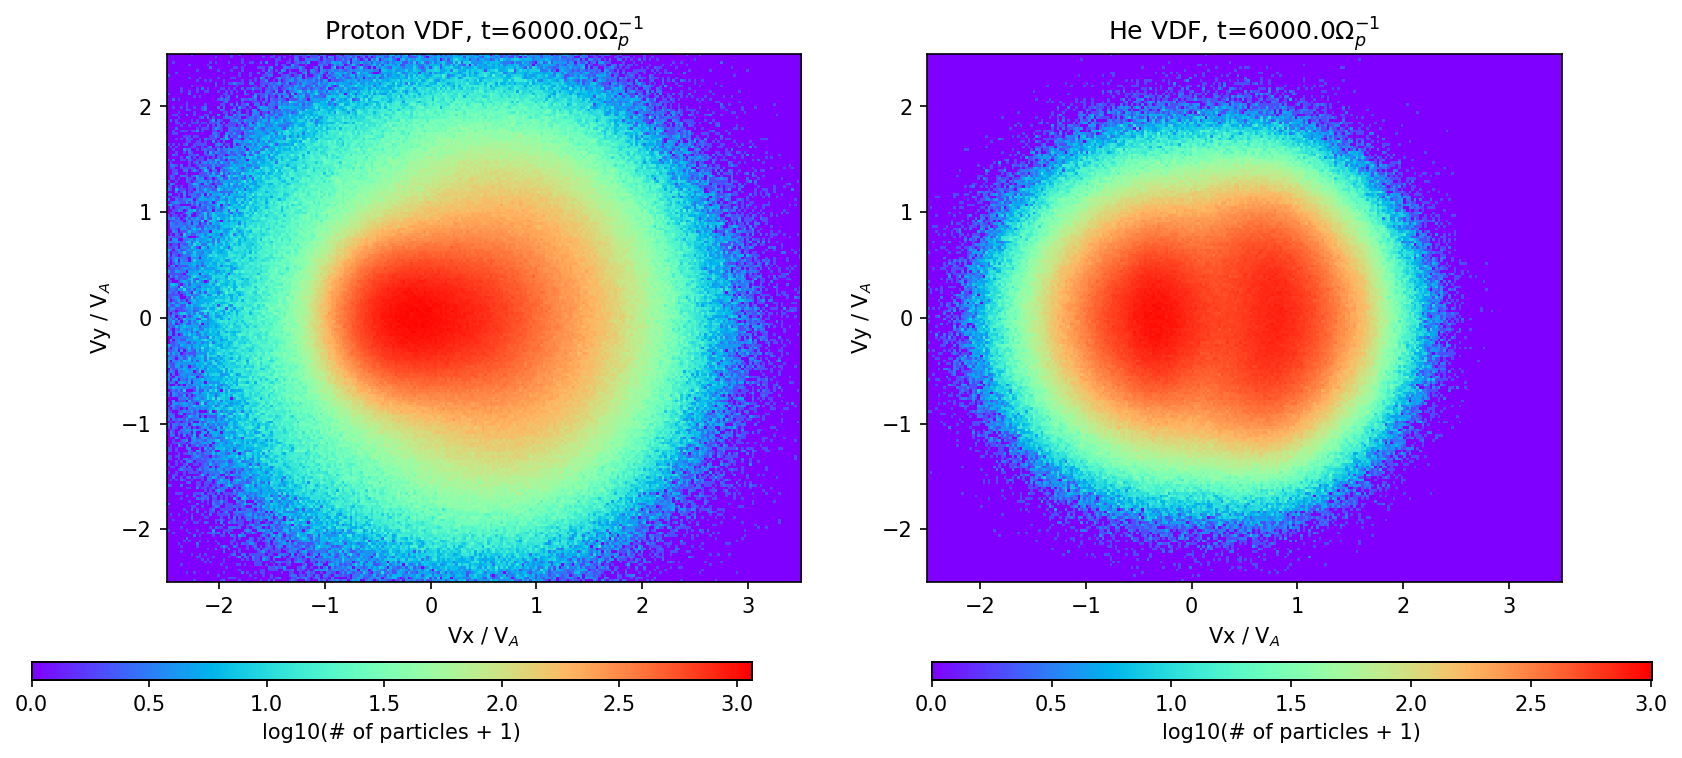

In [31]:
def visualize_histograms_all(vdfp_array, vdfhe_array, vx_edges, vy_edges, timep_array, giffile):
    
    def _visualize_histogram_frame(frameindex):
        ax[0].cla()
        ax[1].cla()
        fig0 = ax[0].imshow(np.log10(vdfp_array[frameindex,:,:].T+1), interpolation='nearest', origin='lower', \
                        extent=[vx_edges[0], vx_edges[-1], vy_edges[0], vy_edges[-1]], cmap='rainbow', \
                        vmin=0, vmax=maxparticles_p)
        ax[0].set(xlabel = r'Vx / V$_{A}$', ylabel = r'Vy / V$_{A}$', \
                  title = r'Proton VDF, t='+str(timep_array[frameindex])[:6]+'$\Omega{}^{-1}_{p}$',\
                  xlim=[-2.5,3.5], ylim=[-2.5,2.5])
        # He VDFs
        fig1 = ax[1].imshow(np.log10(vdfhe_array[frameindex,:,:].T+1), interpolation='nearest', origin='lower', \
                        extent=[vx_edges[0], vx_edges[-1], vy_edges[0], vy_edges[-1]], cmap='rainbow', \
                        vmin=0, vmax=maxparticles_he)
        ax[1].set(xlabel = r'Vx / V$_{A}$', ylabel = r'Vy / V$_{A}$', \
                  title = r'He VDF, t='+str(timep_array[frameindex])[:6]+'$\Omega{}^{-1}_{p}$',\
                  xlim=[-2.5,3.5], ylim=[-2.5,2.5])
        # colorbars
        cbar_ax1 = im.add_axes([0.05, 0.10, 0.40, 0.02])
        cbar_ax2 = im.add_axes([0.55, 0.10, 0.40, 0.02])
        #cbar1 = im.colorbar(fig0, ax=ax[0], label='log10(# of particles + 1)')
        #cbar2 = im.colorbar(fig1, ax=ax[1], label='log10(# of particles + 1)')cax=cbar_ax
        cbar1 = im.colorbar(fig0, cax=cbar_ax1, label='log10(# of particles + 1)', orientation='horizontal')
        cbar2 = im.colorbar(fig1, cax=cbar_ax2, label='log10(# of particles + 1)', orientation='horizontal')
        return
    
    maxparticles_p = np.amax(np.log10(vdfp_array+1))
    maxparticles_he = np.amax(np.log10(vdfhe_array+1))
    
    im, ax = plt.subplots(1, 2, figsize=(12, 6), dpi=150)
    animation = FuncAnimation(im, _visualize_histogram_frame, frames=range(timep_array.shape[0]), interval=200)
    animation.save(giffile, writer='pillow', dpi=150)
    
    return


simfiles_spec = ['particles.d11_A0.5Hepp_beta0.5eps1e-4_256',\
                 'particles.d11_A0.75Hepp_beta1_256',\
                 'particles.d11_E11Ap3.3Aa2.0Vd0.42',\
                 'particles.d11_E11Ap4.3Aa1.6',\
                 'particles.d11_E11Ap4.3Aa1.6Vd0.32',\
                 'particles.d11_E12Ap1.86Aa1.0Vd0.32_256_256x256',\
                 'particles.d11_E12Ap1.86Aa1.0Vd0.32_512_256x256',\
                 'particles.d11_He++A10_256_iden0eps0',\
                 'particles.d11_He++v2_256_256ppc_iden3v0m0.5pwr6eps0',\
                 'particles.d11_He++v2_256_iden0eps1e-4t600',\
                 'particles.d11_He++vd1.5_256_iden0eps1e-4',\
                 'particles.d11_pv1.5_128_64_iden0eps1e-4_dx0.75_long',\
                 'particles.d11_pv2a_128x3_iden0eps1e-4_dx0.75',\
                 'particles.d11_pv2av2_rdna0.03375_128x3_iden0eps1e-4_dx0.75_t6000']

for simindex in range (0, 14, 1):

    simfile = simfiles_spec[simindex]
    print("vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv")
    print("-> SIMULATION: "+simfile)
    print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
    if (simfile == 'particles.d11_pv1.5_128_64_iden0eps1e-4_dx0.75_long'):
        vdfp_array_p1 = np.load('./processing_results/' + simfile + '_p1.vdfp_array.npy')
        vdfhe_array_p1 = np.load('./processing_results/' + simfile + '_p1.vdfhe_array.npy')
        vdfp_array_p2 = np.load('./processing_results/' + simfile + '_p2.vdfp_array.npy')
        vdfhe_array_p2 = np.load('./processing_results/' + simfile + '_p2.vdfhe_array.npy')
        vdfp_array = np.concatenate((vdfp_array_p1, vdfp_array_p2))
        vdfhe_array = np.concatenate((vdfhe_array_p1, vdfhe_array_p2))
    else:
        vdfp_array = np.load('./processing_results/' + simfile + '.vdfp_array.npy')
        vdfhe_array = np.load('./processing_results/' + simfile + '.vdfhe_array.npy')
    timep_array = np.load('./processing_results/' + simfile + '.timep_array.npy')
    print("Total frames:", timep_array.shape[0])
    vx_edges = np.arange(-4.0, 4.0 + 0.025, 0.025)
    vy_edges = np.arange(-4.0, 4.0 + 0.025, 0.025)
    giffile = './visualizations/'+simfile+'.VDFgif.gif'
    visualize_histograms_all(vdfp_array, vdfhe_array, vx_edges, vy_edges, timep_array, giffile)

## Printing out the run properties (anisotropies, relative drifts, particle number ratios)

These are used to determine the grid of the simulations necesary to run. This code also includes semi-random sampling of the parameter space.

In [4]:
def print_parameters(simfile):
    
    timep_array = np.load('./processing_results/' + simfile + '.timep_array.npy')
    anisotropies_p = np.load('./processing_results/' + simfile + '.anisotropies_p.npy')
    moments_p = np.load('./processing_results/' + simfile + '.moments_p.npy')
    anisotropies_he = np.load('./processing_results/' + simfile + '.anisotropies_he.npy')
    moments_he = np.load('./processing_results/' + simfile + '.moments_he.npy')
    
    if (simfile == 'particles.d11_pv1.5_128_64_iden0eps1e-4_dx0.75_long'):
        vdfp_array_p1 = np.load('./processing_results/' + simfile + '_p1.vdfp_array.npy')
        vdfhe_array_p1 = np.load('./processing_results/' + simfile + '_p1.vdfhe_array.npy')
        vdfp_array_p2 = np.load('./processing_results/' + simfile + '_p2.vdfp_array.npy')
        vdfhe_array_p2 = np.load('./processing_results/' + simfile + '_p2.vdfhe_array.npy')
        vdfp_array = np.concatenate((vdfp_array_p1, vdfp_array_p2))
        vdfhe_array = np.concatenate((vdfhe_array_p1, vdfhe_array_p2))
    else:
        vdfp_array = np.load('./processing_results/' + simfile + '.vdfp_array.npy')
        vdfhe_array = np.load('./processing_results/' + simfile + '.vdfhe_array.npy')
    
    p_anis_start = anisotropies_p[0]
    he_anis_start = anisotropies_he[0]
    vdrift_he_p = moments_he[0,0,0] - moments_p[0,0,0]
    he_to_p_ratio = np.sum(vdfhe_array[0,:,:])/np.sum(vdfp_array[0,:,:])
    
    print("---------------------------------------")
    print("Simulation " + simfile)
    print("Proton anisotropy: " + str(p_anis_start))
    print("He anisotropy: " + str(he_anis_start))
    print("Drift: " + str(vdrift_he_p))
    print("Ratio: " + str(he_to_p_ratio), np.sum(vdfhe_array[0,:,:]), np.sum(vdfp_array[0,:,:]))
    
    return


simfiles = ['particles.d11_A0.5Hepp_beta0.5eps1e-4_256',\
            'particles.d11_A0.75Hepp_beta1_256',\
            'particles.d11_E11Ap3.3Aa2.0Vd0.42',\
            'particles.d11_E11Ap4.3Aa1.6',\
            'particles.d11_E11Ap4.3Aa1.6Vd0.32',\
            'particles.d11_E12Ap1.86Aa1.0Vd0.32_256_256x256',\
            'particles.d11_E12Ap1.86Aa1.0Vd0.32_512_256x256',\
            'particles.d11_He++A10_256_iden0eps0',\
            'particles.d11_He++v2_256_iden0eps1e-4t600',\
            'particles.d11_He++vd1.5_256_iden0eps1e-4',\
            'particles.d11_pv1.5_128_64_iden0eps1e-4_dx0.75_long',\
            'particles.d11_pv2a_128x3_iden0eps1e-4_dx0.75',\
            'particles.d11_pv2av2_rdna0.03375_128x3_iden0eps1e-4_dx0.75_t6000']

for simfile in simfiles:
    print_parameters(simfile)

---------------------------------------
Simulation particles.d11_A0.5Hepp_beta0.5eps1e-4_256
Proton anisotropy: 1.001915612986008
He anisotropy: 0.4993516431054969
Drift: -0.00046300106623675674
Ratio: 1.0 4194304.0 4194304.0
---------------------------------------
Simulation particles.d11_A0.75Hepp_beta1_256
Proton anisotropy: 1.0018368276330498
He anisotropy: 0.7491052340725055
Drift: -0.0006185933598317206
Ratio: 1.0001337707150868 4194304.0 4193743.0
---------------------------------------
Simulation particles.d11_E11Ap3.3Aa2.0Vd0.42
Proton anisotropy: 3.3591316681648125
He anisotropy: 2.0497606033096383
Drift: 0.4198642810806632
Ratio: 1.0 8388608.0 8388608.0
---------------------------------------
Simulation particles.d11_E11Ap4.3Aa1.6
Proton anisotropy: 4.29888793057219
He anisotropy: 1.600750362556927
Drift: -0.00013565463814302348
Ratio: 1.0 8388608.0 8388608.0
---------------------------------------
Simulation particles.d11_E11Ap4.3Aa1.6Vd0.32
Proton anisotropy: 4.29888833080

In [12]:
choice_v = [0.0, 0.15, 0.32, 0.42, 0.8, 1.2, 1.5]
choice_p = [1.0, 1.5, 1.86, 2.5, 3.35, 4.30]
choice_he = [0.5, 0.75, 1.0, 1.6, 2.05, 5.0, 10.0]
choice_abund = [[0.9, 0.05], [0.986, 0.007], [0.9, 0.10]]

choice_existing = [[0.0, 1.0, 0.5],\
                   [0.0, 1.0, 0.75],\
                   [0.42, 3.35, 2.05],\
                   [0.0, 4.3, 1.6],\
                   [0.32, 4.3, 1.6],\
                   [0.32, 1.86, 1.0],\
                   [0.32, 1.86, 1.0],\
                   [0.0, 1.0, 10.0],\
                   [1.5, 1.0, 1.0],\
                   [1.5, 1.0, 1.0]]

selections = []
counter = 0

while (True):
    v = random.choice(choice_v)
    p = random.choice(choice_p)
    he = random.choice(choice_he)
    abund = random.choice(choice_abund)
    selection = [v, p, he, abund]
    if ((selection not in choice_existing) and (selection not in selections)):
        selections.append(selection)
        counter += 1
    if (counter >= 40):
        break

selections.sort()
for selection in selections:
    print(selection)

[0.0, 1.0, 1.6, [0.9, 0.1]]
[0.0, 1.5, 1.0, [0.9, 0.05]]
[0.0, 2.5, 0.75, [0.9, 0.05]]
[0.0, 2.5, 0.75, [0.986, 0.007]]
[0.0, 3.35, 0.5, [0.9, 0.05]]
[0.0, 3.35, 1.6, [0.9, 0.05]]
[0.15, 1.86, 5.0, [0.9, 0.1]]
[0.15, 1.86, 5.0, [0.986, 0.007]]
[0.15, 3.35, 1.0, [0.9, 0.1]]
[0.15, 4.3, 0.75, [0.986, 0.007]]
[0.32, 1.0, 2.05, [0.9, 0.1]]
[0.32, 1.0, 2.05, [0.986, 0.007]]
[0.32, 1.0, 5.0, [0.9, 0.1]]
[0.32, 1.0, 5.0, [0.986, 0.007]]
[0.32, 1.5, 1.6, [0.986, 0.007]]
[0.32, 1.86, 1.6, [0.9, 0.05]]
[0.32, 1.86, 2.05, [0.9, 0.1]]
[0.32, 4.3, 5.0, [0.986, 0.007]]
[0.42, 2.5, 1.0, [0.9, 0.05]]
[0.42, 2.5, 1.6, [0.986, 0.007]]
[0.8, 1.86, 1.0, [0.9, 0.05]]
[0.8, 2.5, 1.6, [0.9, 0.1]]
[0.8, 3.35, 1.6, [0.9, 0.05]]
[0.8, 3.35, 5.0, [0.9, 0.1]]
[0.8, 4.3, 5.0, [0.9, 0.05]]
[1.2, 1.5, 1.0, [0.986, 0.007]]
[1.2, 1.5, 5.0, [0.9, 0.1]]
[1.2, 1.86, 0.5, [0.9, 0.1]]
[1.2, 1.86, 0.75, [0.9, 0.05]]
[1.2, 1.86, 5.0, [0.9, 0.1]]
[1.2, 3.35, 1.0, [0.9, 0.05]]
[1.2, 4.3, 2.05, [0.9, 0.05]]
[1.5, 1.0, 2.05, [0.

Selection of runs (extremes):
- [0.0, 1.0, 1.6, [0.9, 0.1]]
- [0.0, 1.5, 1.0, [0.9, 0.05]]
- [0.0, 2.5, 0.75, [0.9, 0.05]]
- [0.0, 2.5, 0.75, [0.986, 0.007]]
- [0.0, 3.35, 0.5, [0.9, 0.05]]
- [0.0, 3.35, 1.6, [0.9, 0.05]]
- [0.15, 1.86, 5.0, [0.9, 0.1]]
- [0.15, 1.86, 5.0, [0.986, 0.007]]
- [0.15, 3.35, 1.0, [0.9, 0.1]]
- [0.15, 4.3, 0.75, [0.986, 0.007]]
- [0.32, 1.0, 2.05, [0.9, 0.1]]
- [0.32, 1.0, 2.05, [0.986, 0.007]]
- [0.32, 1.0, 5.0, [0.9, 0.1]]
- [0.32, 1.0, 5.0, [0.986, 0.007]]
- [0.32, 1.5, 1.6, [0.986, 0.007]]
- [0.32, 1.86, 1.6, [0.9, 0.05]]
- [0.32, 1.86, 2.05, [0.9, 0.1]]
- [0.32, 4.3, 5.0, [0.986, 0.007]]
- [0.42, 2.5, 1.0, [0.9, 0.05]]
- [0.42, 2.5, 1.6, [0.986, 0.007]]
- [0.8, 1.86, 1.0, [0.9, 0.05]]
- [0.8, 2.5, 1.6, [0.9, 0.1]]
- [0.8, 3.35, 1.6, [0.9, 0.05]]
- [0.8, 3.35, 5.0, [0.9, 0.1]]
- [0.8, 4.3, 5.0, [0.9, 0.05]]
- [1.2, 1.5, 1.0, [0.986, 0.007]]
- [1.2, 1.5, 5.0, [0.9, 0.1]]
- [1.2, 1.86, 0.5, [0.9, 0.1]]
- [1.2, 1.86, 0.75, [0.9, 0.05]]
- [1.2, 1.86, 5.0, [0.9, 0.1]]
- [1.2, 3.35, 1.0, [0.9, 0.05]]
- [1.5, 1.0, 2.05, [0.986, 0.007]]
- [1.5, 1.5, 0.75, [0.986, 0.007]]
- [1.5, 1.5, 1.0, [0.9, 0.1]]
- [1.5, 1.5, 1.6, [0.9, 0.1]]
- [1.5, 2.5, 2.05, [0.9, 0.05]]
- [1.5, 2.5, 2.05, [0.986, 0.007]]
- [1.5, 2.5, 5.0, [0.9, 0.05]]

In [14]:
for selection in selections:
    printout = ''
    for element in selection:
        printout += str(element) + '\t'
    print(printout)

0.0	1.0	1.6	[0.9, 0.1]	
0.0	1.5	1.0	[0.9, 0.05]	
0.0	2.5	0.75	[0.9, 0.05]	
0.0	2.5	0.75	[0.986, 0.007]	
0.0	3.35	0.5	[0.9, 0.05]	
0.0	3.35	1.6	[0.9, 0.05]	
0.15	1.86	5.0	[0.9, 0.1]	
0.15	1.86	5.0	[0.986, 0.007]	
0.15	3.35	1.0	[0.9, 0.1]	
0.15	4.3	0.75	[0.986, 0.007]	
0.32	1.0	2.05	[0.9, 0.1]	
0.32	1.0	2.05	[0.986, 0.007]	
0.32	1.0	5.0	[0.9, 0.1]	
0.32	1.0	5.0	[0.986, 0.007]	
0.32	1.5	1.6	[0.986, 0.007]	
0.32	1.86	1.6	[0.9, 0.05]	
0.32	1.86	2.05	[0.9, 0.1]	
0.32	4.3	5.0	[0.986, 0.007]	
0.42	2.5	1.0	[0.9, 0.05]	
0.42	2.5	1.6	[0.986, 0.007]	
0.8	1.86	1.0	[0.9, 0.05]	
0.8	2.5	1.6	[0.9, 0.1]	
0.8	3.35	1.6	[0.9, 0.05]	
0.8	3.35	5.0	[0.9, 0.1]	
0.8	4.3	5.0	[0.9, 0.05]	
1.2	1.5	1.0	[0.986, 0.007]	
1.2	1.5	5.0	[0.9, 0.1]	
1.2	1.86	0.5	[0.9, 0.1]	
1.2	1.86	0.75	[0.9, 0.05]	
1.2	1.86	5.0	[0.9, 0.1]	
1.2	3.35	1.0	[0.9, 0.05]	
1.2	4.3	2.05	[0.9, 0.05]	
1.5	1.0	2.05	[0.986, 0.007]	
1.5	1.5	0.75	[0.986, 0.007]	
1.5	1.5	1.0	[0.9, 0.1]	
1.5	1.5	1.6	[0.9, 0.1]	
1.5	1.5	10.0	[0.9, 0.1]	
1.5	2.5	2.05	[0.9

## Generation of other plots (anisotropies, magnetic energies, etc)

In [3]:
def visualize_parameters(simfile, fieldsfile, savefile):
    
    timep_array = np.load('./processing_results/' + simfile + '.timep_array.npy')
    anisotropies_p = np.load('./processing_results/' + simfile + '.anisotropies_p.npy')
    moments_p = np.load('./processing_results/' + simfile + '.moments_p.npy')
    anisotropies_he = np.load('./processing_results/' + simfile + '.anisotropies_he.npy')
    moments_he = np.load('./processing_results/' + simfile + '.moments_he.npy')
    
    timep_array_fields = np.load('./processing_results/' + fieldsfile + '.timing.npy')
    dx, dy = np.load('./processing_results/' + fieldsfile + '.scales.npy')
    tpal_fields = np.load('./processing_results/' + fieldsfile + '.tpal.npy')
    tper_fields = np.load('./processing_results/' + fieldsfile + '.tper.npy')
    me_perp = np.load('./processing_results/' + fieldsfile + '.me_perp.npy')
    me_tot = np.load('./processing_results/' + fieldsfile + '.me_tot.npy')
    
    matplotlib.rcParams.update({'font.size':10})
    im, ax = plt.subplots(4, 2, figsize = (10, 12), dpi=150)
    
    plt.suptitle(simfile)
    
    ax[0,0].plot(timep_array,anisotropies_p)
    ax[0,0].set(xlabel=r'Time, $\Omega{}^{-1}_{p}$', ylabel='Proton Anisotropy')
    
    ax[0,1].plot(timep_array,anisotropies_he)
    ax[0,1].set(xlabel=r'Time, $\Omega{}^{-1}_{p}$', ylabel='He Anisotropy')
    
    ax[1,0].plot(timep_array,moments_p[:,1,0], label=r'T$_{||}$')
    ax[1,0].plot(timep_array,moments_p[:,1,1], label=r'T$_{\perp}$')
    ax[1,0].set(xlabel=r'Time, $\Omega{}^{-1}_{p}$', ylabel='Proton temperatures, $<(V/V_{A})^{2}>$')
    ax[1,0].legend()
    
    ax[1,1].plot(timep_array,moments_he[:,1,0], label=r'T$_{||}$')
    ax[1,1].plot(timep_array,moments_he[:,1,1], label=r'T$_{\perp}$')
    ax[1,1].set(xlabel=r'Time, $\Omega{}^{-1}_{p}$', ylabel='He temperatures, $<(V/V_{A})^{2}>$')
    ax[1,1].legend()
    
    ax[2,0].plot(timep_array,moments_p[:,0,0], label=r'Vx/VA')
    ax[2,0].plot(timep_array,moments_p[:,0,1], label=r'Vyz/VA')
    ax[2,0].set(xlabel=r'Time, $\Omega{}^{-1}_{p}$', ylabel='Proton mean velocities')
    ax[2,0].legend()
    
    ax[2,1].plot(timep_array,moments_he[:,0,0], label=r'Vx/VA')
    ax[2,1].plot(timep_array,moments_he[:,0,1], label=r'Vyz/VA')
    ax[2,1].set(xlabel=r'Time, $\Omega{}^{-1}_{p}$', ylabel='He mean velocities')
    ax[2,1].legend()
    
    ax[3,0].plot(timep_array_fields[:,1], me_tot)
    ax[3,0].set(xlabel=r'Time, $\Omega{}^{-1}_{p}$', ylabel='Total magnetic energy, Units')
    ax[3,1].plot(timep_array_fields[:,1], me_perp)
    ax[3,1].set(xlabel=r'Time, $\Omega{}^{-1}_{p}$', ylabel='Perpendicular magnetic energy, Units')
    
    plt.tight_layout()
    plt.savefig(savefile)
    plt.close()
    
    
simfiles = ['particles.d11_A0.5Hepp_beta0.5eps1e-4_256',\
            'particles.d11_A0.75Hepp_beta1_256',\
            'particles.d11_E11Ap3.3Aa2.0Vd0.42',\
            'particles.d11_E11Ap4.3Aa1.6',\
            'particles.d11_E11Ap4.3Aa1.6Vd0.32',\
            'particles.d11_E12Ap1.86Aa1.0Vd0.32_256_256x256',\
            'particles.d11_E12Ap1.86Aa1.0Vd0.32_512_256x256',\
            'particles.d11_He++A10_256_iden0eps0',\
            'particles.d11_He++v2_256_iden0eps1e-4t600',\
            'particles.d11_He++vd1.5_256_iden0eps1e-4',\
            'particles.d11_pv1.5_128_64_iden0eps1e-4_dx0.75_long',\
            'particles.d11_pv2a_128x3_iden0eps1e-4_dx0.75',\
            'particles.d11_pv2av2_rdna0.03375_128x3_iden0eps1e-4_dx0.75_t6000']

fldfiles = ['fields.d10_A0.5Hepp_beta0.5eps1e-4_256',\
            'fields.d10_A0.75Hepp_beta1_256',\
            'fields.d10_E11Ap3.3Aa2.0Vd0.42',\
            'fields.d10_E11Ap4.3Aa1.6',\
            'fields.d10_E11Ap4.3Aa1.6Vd0.32',\
            'fields.d10_E12Ap1.86Aa1.0Vd0.32_256_256x256',\
            'fields.d10_E12Ap1.86Aa1.0Vd0.32_512_256x256',\
            'fields.d10_He++A10_256_iden0eps0',\
            'fields.d10_He++v2_256_iden0eps1e-4t600',\
            'fields.d10_He++vd1.5_256_iden0eps1e-4',\
            'fields.d10_pv1.5_128_64_iden0eps1e-4_dx0.75_long',\
            'fields.d10_pv2a_128x3_iden0eps1e-4_dx0.75',\
            'fields.d10_pv2av2_rdna0.03375_128x3_iden0eps1e-4_dx0.75_t6000']

for i in range (0, 13, 1):
    savefile = './visualizations/tplot.' + simfiles[i] + '.png'
    visualize_parameters(simfiles[i], fldfiles[i], savefile)
    print("Time plots for the simulation " + simfiles[i] + " processed")

Time plots for the simulation particles.d11_A0.5Hepp_beta0.5eps1e-4_256 processed
Time plots for the simulation particles.d11_A0.75Hepp_beta1_256 processed
Time plots for the simulation particles.d11_E11Ap3.3Aa2.0Vd0.42 processed
Time plots for the simulation particles.d11_E11Ap4.3Aa1.6 processed
Time plots for the simulation particles.d11_E11Ap4.3Aa1.6Vd0.32 processed
Time plots for the simulation particles.d11_E12Ap1.86Aa1.0Vd0.32_256_256x256 processed
Time plots for the simulation particles.d11_E12Ap1.86Aa1.0Vd0.32_512_256x256 processed
Time plots for the simulation particles.d11_He++A10_256_iden0eps0 processed
Time plots for the simulation particles.d11_He++v2_256_iden0eps1e-4t600 processed
Time plots for the simulation particles.d11_He++vd1.5_256_iden0eps1e-4 processed
Time plots for the simulation particles.d11_pv1.5_128_64_iden0eps1e-4_dx0.75_long processed
Time plots for the simulation particles.d11_pv2a_128x3_iden0eps1e-4_dx0.75 processed
Time plots for the simulation particle

In [18]:
def setscale_yaxis(variable, minrange, axis):
    varmin = np.amin(variable)
    varmax = np.amax(variable)
    if ((varmax - varmin) < minrange):
        axismin = np.mean(variable) - minrange
        axismax = np.mean(variable) + minrange
        axis.set(ylim = [axismin,axismax])
    return

def visualize_parameters(simfile, fieldsfile, savefile):
    
    timep_array = np.load('./processing_results/' + simfile + '.timep_array.npy')
    anisotropies_p = np.load('./processing_results/' + simfile + '.anisotropies_p.npy')
    moments_p = np.load('./processing_results/' + simfile + '.moments_p.npy')
    anisotropies_he = np.load('./processing_results/' + simfile + '.anisotropies_he.npy')
    moments_he = np.load('./processing_results/' + simfile + '.moments_he.npy')
    
    timep_array_fields = np.load('./processing_results/' + fieldsfile + '.timing.npy')
    dx, dy = np.load('./processing_results/' + fieldsfile + '.scales.npy')
    tpal_fields = np.load('./processing_results/' + fieldsfile + '.tpal.npy')
    tper_fields = np.load('./processing_results/' + fieldsfile + '.tper.npy')
    me_perp = np.load('./processing_results/' + fieldsfile + '.me_perp.npy')
    me_tot = np.load('./processing_results/' + fieldsfile + '.me_tot.npy')
    
    matplotlib.rcParams.update({'font.size':10})
    im, ax = plt.subplots(4, 2, figsize = (10, 12), dpi=150)
    
    plt.suptitle(simfile)
    
    
    ax[0,0].plot(timep_array,anisotropies_p)
    ax[0,0].set(xlabel=r'Time, $\Omega{}^{-1}_{p}$', ylabel='Proton Anisotropy')
    setscale_yaxis(anisotropies_p, 0.25, ax[0,0])
    
    ax[0,1].plot(timep_array,anisotropies_he)
    ax[0,1].set(xlabel=r'Time, $\Omega{}^{-1}_{p}$', ylabel='He Anisotropy')
    setscale_yaxis(anisotropies_he, 0.25, ax[0,1])
    
    ax[1,0].plot(timep_array,moments_p[:,1,0], label=r'T$_{||}$')
    ax[1,0].plot(timep_array,moments_p[:,1,1], label=r'T$_{\perp}$')
    ax[1,0].set(xlabel=r'Time, $\Omega{}^{-1}_{p}$', ylabel='Proton temperatures, $<(V/V_{A})^{2}>$')
    ax[1,0].legend()
    
    ax[1,1].plot(timep_array,moments_he[:,1,0], label=r'T$_{||}$')
    ax[1,1].plot(timep_array,moments_he[:,1,1], label=r'T$_{\perp}$')
    ax[1,1].set(xlabel=r'Time, $\Omega{}^{-1}_{p}$', ylabel='He temperatures, $<(V/V_{A})^{2}>$')
    ax[1,1].legend()
    
    ax[2,0].plot(timep_array,moments_p[:,0,0], label=r'Vx/VA')
    ax[2,0].plot(timep_array,moments_p[:,0,1], label=r'Vyz/VA')
    ax[2,0].set(xlabel=r'Time, $\Omega{}^{-1}_{p}$', ylabel='Proton mean velocities')
    ax[2,0].legend()
    setscale_yaxis(moments_p[:,0,0:2], 0.25, ax[2,0])
    
    ax[2,1].plot(timep_array,moments_he[:,0,0], label=r'Vx/VA')
    ax[2,1].plot(timep_array,moments_he[:,0,1], label=r'Vyz/VA')
    ax[2,1].set(xlabel=r'Time, $\Omega{}^{-1}_{p}$', ylabel='He mean velocities')
    ax[2,1].legend()
    setscale_yaxis(moments_he[:,0,0:2], 0.25, ax[2,1])
    
    dtime = timep_array_fields[1,1] - timep_array_fields[0,1]
    npoints = int(100/dtime)
    if (npoints % 2 == 0): npoints = npoints + 1
    ax[3,0].plot(timep_array_fields[:,1], savgol_filter(me_tot - me_tot[0], npoints, 2))
    ax[3,0].set(xlabel=r'Time, $\Omega{}^{-1}_{p}$', ylabel=r'$\Delta$ Total magnetic energy, Units')
    ax[3,1].plot(timep_array_fields[:,1], savgol_filter(me_perp, npoints, 2))
    ax[3,1].set(xlabel=r'Time, $\Omega{}^{-1}_{p}$', ylabel='Perpendicular magnetic energy, Units')
    
    plt.tight_layout()
    plt.savefig(savefile)
    plt.close()
    
    
simfiles = ['particles.d11_A0.5Hepp_beta0.5eps1e-4_256',\
            'particles.d11_A0.75Hepp_beta1_256',\
            'particles.d11_E11Ap3.3Aa2.0Vd0.42',\
            'particles.d11_E11Ap4.3Aa1.6',\
            'particles.d11_E11Ap4.3Aa1.6Vd0.32',\
            'particles.d11_E12Ap1.86Aa1.0Vd0.32_256_256x256',\
            'particles.d11_E12Ap1.86Aa1.0Vd0.32_512_256x256',\
            'particles.d11_He++A10_256_iden0eps0',\
            'particles.d11_He++v2_256_iden0eps1e-4t600',\
            'particles.d11_He++vd1.5_256_iden0eps1e-4',\
            'particles.d11_pv1.5_128_64_iden0eps1e-4_dx0.75_long',\
            'particles.d11_pv2a_128x3_iden0eps1e-4_dx0.75',\
            'particles.d11_pv2av2_rdna0.03375_128x3_iden0eps1e-4_dx0.75_t6000']

fldfiles = ['fields.d10_A0.5Hepp_beta0.5eps1e-4_256',\
            'fields.d10_A0.75Hepp_beta1_256',\
            'fields.d10_E11Ap3.3Aa2.0Vd0.42',\
            'fields.d10_E11Ap4.3Aa1.6',\
            'fields.d10_E11Ap4.3Aa1.6Vd0.32',\
            'fields.d10_E12Ap1.86Aa1.0Vd0.32_256_256x256',\
            'fields.d10_E12Ap1.86Aa1.0Vd0.32_512_256x256',\
            'fields.d10_He++A10_256_iden0eps0',\
            'fields.d10_He++v2_256_iden0eps1e-4t600',\
            'fields.d10_He++vd1.5_256_iden0eps1e-4',\
            'fields.d10_pv1.5_128_64_iden0eps1e-4_dx0.75_long',\
            'fields.d10_pv2a_128x3_iden0eps1e-4_dx0.75',\
            'fields.d10_pv2av2_rdna0.03375_128x3_iden0eps1e-4_dx0.75_t6000']

for i in range (0, 13, 1):
    savefile = './visualizations/tplot_norm.' + simfiles[i] + '.png'
    visualize_parameters(simfiles[i], fldfiles[i], savefile)
    print("Time plots for the simulation " + simfiles[i] + " processed")

Time plots for the simulation particles.d11_A0.5Hepp_beta0.5eps1e-4_256 processed
Time plots for the simulation particles.d11_A0.75Hepp_beta1_256 processed
Time plots for the simulation particles.d11_E11Ap3.3Aa2.0Vd0.42 processed
Time plots for the simulation particles.d11_E11Ap4.3Aa1.6 processed
Time plots for the simulation particles.d11_E11Ap4.3Aa1.6Vd0.32 processed
Time plots for the simulation particles.d11_E12Ap1.86Aa1.0Vd0.32_256_256x256 processed
Time plots for the simulation particles.d11_E12Ap1.86Aa1.0Vd0.32_512_256x256 processed
Time plots for the simulation particles.d11_He++A10_256_iden0eps0 processed
Time plots for the simulation particles.d11_He++v2_256_iden0eps1e-4t600 processed
Time plots for the simulation particles.d11_He++vd1.5_256_iden0eps1e-4 processed
Time plots for the simulation particles.d11_pv1.5_128_64_iden0eps1e-4_dx0.75_long processed
Time plots for the simulation particles.d11_pv2a_128x3_iden0eps1e-4_dx0.75 processed
Time plots for the simulation particle

## Determination of stable and unstable VDFs

This overall remains an open question. Inspections of the VDFs and time parameters revealed the cases when the magnetic energy remains stable, but the anisotropies and temperatures change / exchange.

For the time being, we will adopt the following criterion. We will consider the VDFs to be stable if the corresponding anosotropies and perpendicular energies do not change for more than 1% per 10 gyroperiods (the threshold which seemed to be reasonable during the previous experimentations).

In [33]:
def setscale_yaxis(variable, minrange, axis):
    varmin = np.amin(variable)
    varmax = np.amax(variable)
    if ((varmax - varmin) < minrange):
        axismin = np.mean(variable) - minrange
        axismax = np.mean(variable) + minrange
        axis.set(ylim = [axismin,axismax])
    return

def boxcar_smooth(data, window_size):
    boxcar = np.ones(window_size) / window_size
    smoothed_data = np.convolve(data, boxcar, mode='same')
    return smoothed_data

def visualize_parameters_dt(simfile, fieldsfile, savefile):
    
    timep_array = np.load('./processing_results/' + simfile + '.timep_array.npy')
    anisotropies_p = np.load('./processing_results/' + simfile + '.anisotropies_p.npy')
    anisotropies_he = np.load('./processing_results/' + simfile + '.anisotropies_he.npy')
    
    timep_array_fields = np.load('./processing_results/' + fieldsfile + '.timing.npy')[:,1]
    me_perp = np.load('./processing_results/' + fieldsfile + '.me_perp.npy')
    me_tot = np.load('./processing_results/' + fieldsfile + '.me_tot.npy')
    # applying smoothing to remove a periodic signal
    dtime = timep_array_fields[1] - timep_array_fields[0]
    npoints = int(200/dtime)
    if (npoints % 2 == 0): npoints = npoints + 1
    me_tot = savgol_filter(me_tot - me_tot[0], npoints, 2)
    me_perp = savgol_filter(me_perp, npoints, 2)
    
    # resampling to the timing of the VDFs
    me_tot = np.interp(timep_array,timep_array_fields,me_tot)
    me_perp = np.interp(timep_array,timep_array_fields,me_perp)
    
    # time derivatives
    dt_anisotropies_p = (anisotropies_p[1:]-anisotropies_p[:-1])/(timep_array[1:]-timep_array[:-1])
    dt_anisotropies_he = (anisotropies_he[1:]-anisotropies_he[:-1])/(timep_array[1:]-timep_array[:-1])
    dt_me_perp = (me_perp[1:]-me_perp[:-1])/(timep_array[1:]-timep_array[:-1])
    dt_me_tot = (me_tot[1:]-me_tot[:-1])/(timep_array[1:]-timep_array[:-1])
    
    # generating some plots
    matplotlib.rcParams.update({'font.size':10})
    im, ax = plt.subplots(4, 2, figsize = (10, 12), dpi=150)
    
    ax[0,0].plot(timep_array,anisotropies_p)
    ax[0,0].set(xlabel=r'Time, $\Omega{}^{-1}_{p}$', ylabel='Proton Anisotropy')
    setscale_yaxis(anisotropies_p, 0.25, ax[0,0])
    
    ax[0,1].plot(timep_array,anisotropies_he)
    ax[0,1].set(xlabel=r'Time, $\Omega{}^{-1}_{p}$', ylabel='He Anisotropy')
    setscale_yaxis(anisotropies_he, 0.25, ax[0,1])
    
    ax[1,0].plot(timep_array, me_tot)
    ax[1,0].set(xlabel=r'Time, $\Omega{}^{-1}_{p}$', ylabel=r'$\Delta$ Total magnetic energy, Units')
    ax[1,1].plot(timep_array, me_perp)
    ax[1,1].set(xlabel=r'Time, $\Omega{}^{-1}_{p}$', ylabel='Perpendicular magnetic energy, Units')
    
    # derivatives
    
    ax[2,0].plot(timep_array[:-1], 2*(dt_anisotropies_p)/(anisotropies_p[1:]+anisotropies_p[:-1]))
    ax[2,0].set(xlabel=r'Time, $\Omega{}^{-1}_{p}$', ylabel=r'$\delta$(Proton Anisotropy)/dt')
    ax[2,0].plot([timep_array[0],timep_array[-1]],[0.001,0.001],color='red')
    ax[2,0].plot([timep_array[0],timep_array[-1]],[-0.001,-0.001],color='red')
    
    ax[2,1].plot(timep_array[:-1], 2*(dt_anisotropies_he)/(anisotropies_he[1:]+anisotropies_he[:-1]))
    ax[2,1].set(xlabel=r'Time, $\Omega{}^{-1}_{p}$', ylabel=r'$\delta$(He Anisotropy)/dt')
    ax[2,1].plot([timep_array[0],timep_array[-1]],[0.001,0.001],color='red')
    ax[2,1].plot([timep_array[0],timep_array[-1]],[-0.001,-0.001],color='red')
    
    ax[3,0].plot(timep_array[:-1], 2*(dt_me_tot)/(me_tot[1:]+me_tot[:-1]))
    ax[3,0].set(xlabel=r'Time, $\Omega{}^{-1}_{p}$', ylabel=r'$\delta$($\Delta$ Total magnetic energy)/dt')
    ax[3,0].plot([timep_array[0],timep_array[-1]],[0.001,0.001],color='red')
    ax[3,0].plot([timep_array[0],timep_array[-1]],[-0.001,-0.001],color='red')
    
    ax[3,1].plot(timep_array[:-1], 2*(dt_me_perp)/(me_perp[1:]+me_perp[:-1]))
    ax[3,1].set(xlabel=r'Time, $\Omega{}^{-1}_{p}$', ylabel=r'$\delta$(Perpendicular magnetic energy)/dt')
    ax[3,1].plot([timep_array[0],timep_array[-1]],[0.001,0.001],color='red')
    ax[3,1].plot([timep_array[0],timep_array[-1]],[-0.001,-0.001],color='red')
    
    plt.tight_layout()
    plt.savefig(savefile)
    plt.close()
    
    return
    
    
simfiles = ['particles.d11_A0.5Hepp_beta0.5eps1e-4_256',\
            'particles.d11_A0.75Hepp_beta1_256',\
            'particles.d11_E11Ap3.3Aa2.0Vd0.42',\
            'particles.d11_E11Ap4.3Aa1.6',\
            'particles.d11_E11Ap4.3Aa1.6Vd0.32',\
            'particles.d11_E12Ap1.86Aa1.0Vd0.32_256_256x256',\
            'particles.d11_E12Ap1.86Aa1.0Vd0.32_512_256x256',\
            'particles.d11_He++A10_256_iden0eps0',\
            'particles.d11_He++v2_256_iden0eps1e-4t600',\
            'particles.d11_He++vd1.5_256_iden0eps1e-4',\
            'particles.d11_pv1.5_128_64_iden0eps1e-4_dx0.75_long',\
            'particles.d11_pv2a_128x3_iden0eps1e-4_dx0.75',\
            'particles.d11_pv2av2_rdna0.03375_128x3_iden0eps1e-4_dx0.75_t6000']

fldfiles = ['fields.d10_A0.5Hepp_beta0.5eps1e-4_256',\
            'fields.d10_A0.75Hepp_beta1_256',\
            'fields.d10_E11Ap3.3Aa2.0Vd0.42',\
            'fields.d10_E11Ap4.3Aa1.6',\
            'fields.d10_E11Ap4.3Aa1.6Vd0.32',\
            'fields.d10_E12Ap1.86Aa1.0Vd0.32_256_256x256',\
            'fields.d10_E12Ap1.86Aa1.0Vd0.32_512_256x256',\
            'fields.d10_He++A10_256_iden0eps0',\
            'fields.d10_He++v2_256_iden0eps1e-4t600',\
            'fields.d10_He++vd1.5_256_iden0eps1e-4',\
            'fields.d10_pv1.5_128_64_iden0eps1e-4_dx0.75_long',\
            'fields.d10_pv2a_128x3_iden0eps1e-4_dx0.75',\
            'fields.d10_pv2av2_rdna0.03375_128x3_iden0eps1e-4_dx0.75_t6000']

for i in range (0, 13, 1):
    savefile = './visualizations/tplot_dt.' + simfiles[i] + '.png'
    visualize_parameters_dt(simfiles[i], fldfiles[i], savefile)
    print("Time plots for the simulation " + simfiles[i] + " processed")

Time plots for the simulation particles.d11_A0.5Hepp_beta0.5eps1e-4_256 processed
Time plots for the simulation particles.d11_A0.75Hepp_beta1_256 processed
Time plots for the simulation particles.d11_E11Ap3.3Aa2.0Vd0.42 processed
Time plots for the simulation particles.d11_E11Ap4.3Aa1.6 processed
Time plots for the simulation particles.d11_E11Ap4.3Aa1.6Vd0.32 processed
Time plots for the simulation particles.d11_E12Ap1.86Aa1.0Vd0.32_256_256x256 processed
Time plots for the simulation particles.d11_E12Ap1.86Aa1.0Vd0.32_512_256x256 processed
Time plots for the simulation particles.d11_He++A10_256_iden0eps0 processed
Time plots for the simulation particles.d11_He++v2_256_iden0eps1e-4t600 processed
Time plots for the simulation particles.d11_He++vd1.5_256_iden0eps1e-4 processed
Time plots for the simulation particles.d11_pv1.5_128_64_iden0eps1e-4_dx0.75_long processed
Time plots for the simulation particles.d11_pv2a_128x3_iden0eps1e-4_dx0.75 processed
Time plots for the simulation particle

The figures seem to be reasonable, and for the first two simulations the initial time moments have to be omitted (due to closeness of the starting point to zero). Now we can assemble the simulations into the data set.

In [2]:
def prepare_mldata_vdfmoments(simfile, fieldsfile):
    
    timep_array = np.load('./processing_results/' + simfile + '.timep_array.npy')
    anisotropies_p = np.load('./processing_results/' + simfile + '.anisotropies_p.npy')
    moments_p = np.load('./processing_results/' + simfile + '.moments_p.npy')
    anisotropies_he = np.load('./processing_results/' + simfile + '.anisotropies_he.npy')
    moments_he = np.load('./processing_results/' + simfile + '.moments_he.npy')
    
    if (simfile == 'particles.d11_pv1.5_128_64_iden0eps1e-4_dx0.75_long'):
        vdfp_array_p1 = np.load('./processing_results/' + simfile + '_p1.vdfp_array.npy')
        vdfhe_array_p1 = np.load('./processing_results/' + simfile + '_p1.vdfhe_array.npy')
        vdfp_array_p2 = np.load('./processing_results/' + simfile + '_p2.vdfp_array.npy')
        vdfhe_array_p2 = np.load('./processing_results/' + simfile + '_p2.vdfhe_array.npy')
        vdfp_array = np.concatenate((vdfp_array_p1, vdfp_array_p2))
        vdfhe_array = np.concatenate((vdfhe_array_p1, vdfhe_array_p2))
    else:
        vdfp_array = np.load('./processing_results/' + simfile + '.vdfp_array.npy')
        vdfhe_array = np.load('./processing_results/' + simfile + '.vdfhe_array.npy')
    
    timep_array_fields = np.load('./processing_results/' + fieldsfile + '.timing.npy')[:,1]
    me_perp = np.load('./processing_results/' + fieldsfile + '.me_perp.npy')
    me_tot = np.load('./processing_results/' + fieldsfile + '.me_tot.npy')
    # applying smoothing to remove a periodic signal
    dtime = timep_array_fields[1] - timep_array_fields[0]
    npoints = int(200/dtime)
    if (npoints % 2 == 0): npoints = npoints + 1
    me_tot = savgol_filter(me_tot - me_tot[0], npoints, 2)
    me_perp = savgol_filter(me_perp, npoints, 2)
    
    # resampling to the timing of the VDFs
    me_tot = np.interp(timep_array,timep_array_fields,me_tot)
    me_perp = np.interp(timep_array,timep_array_fields,me_perp)
    
    # time derivatives (relative)
    dt_anisotropies_p = (anisotropies_p[1:]-anisotropies_p[:-1])/(timep_array[1:]-timep_array[:-1])
    dt_anisotropies_p = 2*(dt_anisotropies_p)/(anisotropies_p[1:]+anisotropies_p[:-1])
    dt_anisotropies_he = (anisotropies_he[1:]-anisotropies_he[:-1])/(timep_array[1:]-timep_array[:-1])
    dt_anisotropies_he = 2*(dt_anisotropies_he)/(anisotropies_he[1:]+anisotropies_he[:-1])
    dt_me_perp = (me_perp[1:]-me_perp[:-1])/(timep_array[1:]-timep_array[:-1])
    dt_me_perp = 2*(dt_me_perp)/(me_perp[1:]+me_perp[:-1])
    dt_me_tot = (me_tot[1:]-me_tot[:-1])/(timep_array[1:]-timep_array[:-1])
    dt_me_tot = 2*(dt_me_tot)/(me_tot[1:]+me_tot[:-1])
    
    featurevector_allmoments = []
    labels_allmoments = []
    for i in range (0, len(timep_array)-1, 1):
        subvector = []
        subvector.append(moments_p[i,0,0])
        subvector.append(moments_p[i,0,1])
        subvector.append(moments_p[i,1,0])
        subvector.append(moments_p[i,1,1])
        subvector.append(moments_p[i,2,0])
        subvector.append(moments_p[i,2,1])
        subvector.append(moments_p[i,3,0])
        subvector.append(moments_p[i,3,1])
        subvector.append(moments_he[i,0,0])
        subvector.append(moments_he[i,0,1])
        subvector.append(moments_he[i,1,0])
        subvector.append(moments_he[i,1,1])
        subvector.append(moments_he[i,2,0])
        subvector.append(moments_he[i,2,1])
        subvector.append(moments_he[i,3,0])
        subvector.append(moments_he[i,3,1])
        subvector.append(anisotropies_p[i])
        subvector.append(anisotropies_he[i])
        subvector.append(np.log10(np.sum(vdfp_array[i,:,:])))
        subvector.append(np.log10(np.sum(vdfhe_array[i,:,:])))
        subvector.append(np.sum(vdfp_array[i,:,:])/np.sum(vdfhe_array[i,:,:]))
        if ((simfile == 'particles.d11_A0.5Hepp_beta0.5eps1e-4_256') and (timep_array[i] < 200)):
            labels_allmoments.append(0)
            featurevector_allmoments.append(subvector)
            continue
        if ((simfile == 'particles.d11_A0.75Hepp_beta1_256') and (timep_array[i] < 200)):
            labels_allmoments.append(0)
            featurevector_allmoments.append(subvector)
            continue
        # instability condition
        if ((np.abs(dt_anisotropies_p[i]) > 0.001) or (np.abs(dt_anisotropies_he[i]) > 0.001) \
            or (np.abs(dt_me_perp[i]) > 0.001)):
            labels_allmoments.append(1)
            featurevector_allmoments.append(subvector)
        else:
            labels_allmoments.append(0)
            featurevector_allmoments.append(subvector)
            
    featurevector_allmoments = np.array(featurevector_allmoments, dtype='float')
    labels_allmoments = np.array(labels_allmoments, dtype='float')
    return featurevector_allmoments, labels_allmoments, timep_array
    
    
simfiles = ['particles.d11_A0.5Hepp_beta0.5eps1e-4_256',\
            'particles.d11_A0.75Hepp_beta1_256',\
            'particles.d11_E11Ap3.3Aa2.0Vd0.42',\
            'particles.d11_E11Ap4.3Aa1.6',\
            'particles.d11_E11Ap4.3Aa1.6Vd0.32',\
            'particles.d11_E12Ap1.86Aa1.0Vd0.32_256_256x256',\
            'particles.d11_E12Ap1.86Aa1.0Vd0.32_512_256x256',\
            'particles.d11_He++A10_256_iden0eps0',\
            'particles.d11_He++v2_256_iden0eps1e-4t600',\
            'particles.d11_He++vd1.5_256_iden0eps1e-4',\
            'particles.d11_pv1.5_128_64_iden0eps1e-4_dx0.75_long',\
            'particles.d11_pv2a_128x3_iden0eps1e-4_dx0.75',\
            'particles.d11_pv2av2_rdna0.03375_128x3_iden0eps1e-4_dx0.75_t6000']

fldfiles = ['fields.d10_A0.5Hepp_beta0.5eps1e-4_256',\
            'fields.d10_A0.75Hepp_beta1_256',\
            'fields.d10_E11Ap3.3Aa2.0Vd0.42',\
            'fields.d10_E11Ap4.3Aa1.6',\
            'fields.d10_E11Ap4.3Aa1.6Vd0.32',\
            'fields.d10_E12Ap1.86Aa1.0Vd0.32_256_256x256',\
            'fields.d10_E12Ap1.86Aa1.0Vd0.32_512_256x256',\
            'fields.d10_He++A10_256_iden0eps0',\
            'fields.d10_He++v2_256_iden0eps1e-4t600',\
            'fields.d10_He++vd1.5_256_iden0eps1e-4',\
            'fields.d10_pv1.5_128_64_iden0eps1e-4_dx0.75_long',\
            'fields.d10_pv2a_128x3_iden0eps1e-4_dx0.75',\
            'fields.d10_pv2av2_rdna0.03375_128x3_iden0eps1e-4_dx0.75_t6000']

featurevector_allmoments, labels_allmoments, timep_array = prepare_mldata_vdfmoments(simfiles[0], fldfiles[0])
print("ML data for the simulation " + simfiles[0] + " generated")
featurevector_allmoments_all = np.copy(featurevector_allmoments)
labels_allmoments_all = np.copy(labels_allmoments)
timep_array_all = np.copy(timep_array)
np.save('./mldata_vdfmoments/'+simfiles[0]+'.mldata_moments.npy', featurevector_allmoments)
np.save('./mldata_vdfmoments/'+simfiles[0]+'.mldata_labels.npy', labels_allmoments)
np.save('./mldata_vdfmoments/'+simfiles[0]+'.mldata_timep.npy', timep_array)

for i in range (1, 13, 1):
    featurevector_allmoments, labels_allmoments, timep_array = prepare_mldata_vdfmoments(simfiles[i], fldfiles[i])
    print("ML data for the simulation " + simfiles[i] + " generated")
    np.save('./mldata_vdfmoments/'+simfiles[i]+'.mldata_moments.npy', featurevector_allmoments)
    np.save('./mldata_vdfmoments/'+simfiles[i]+'.mldata_labels.npy', labels_allmoments)
    np.save('./mldata_vdfmoments/'+simfiles[i]+'.mldata_timep.npy', timep_array)
    featurevector_allmoments_all = np.concatenate((featurevector_allmoments_all, featurevector_allmoments))
    labels_allmoments_all = np.concatenate((labels_allmoments_all, labels_allmoments))
    timep_array_all = np.concatenate((timep_array_all, timep_array))
    
np.save('./mldata_vdfmoments/allsimulations.mldata_moments.npy', featurevector_allmoments_all)
np.save('./mldata_vdfmoments/allsimulations.mldata_labels.npy', labels_allmoments_all)
np.save('./mldata_vdfmoments/allsimulations.mldata_timep.npy', timep_array_all)

ML data for the simulation particles.d11_A0.5Hepp_beta0.5eps1e-4_256 generated
ML data for the simulation particles.d11_A0.75Hepp_beta1_256 generated
ML data for the simulation particles.d11_E11Ap3.3Aa2.0Vd0.42 generated
ML data for the simulation particles.d11_E11Ap4.3Aa1.6 generated
ML data for the simulation particles.d11_E11Ap4.3Aa1.6Vd0.32 generated
ML data for the simulation particles.d11_E12Ap1.86Aa1.0Vd0.32_256_256x256 generated
ML data for the simulation particles.d11_E12Ap1.86Aa1.0Vd0.32_512_256x256 generated
ML data for the simulation particles.d11_He++A10_256_iden0eps0 generated
ML data for the simulation particles.d11_He++v2_256_iden0eps1e-4t600 generated
ML data for the simulation particles.d11_He++vd1.5_256_iden0eps1e-4 generated
ML data for the simulation particles.d11_pv1.5_128_64_iden0eps1e-4_dx0.75_long generated
ML data for the simulation particles.d11_pv2a_128x3_iden0eps1e-4_dx0.75 generated
ML data for the simulation particles.d11_pv2av2_rdna0.03375_128x3_iden0eps